# 1.Introduction
>  IBM employee dataset contain the many data of employee such as age, distance between home and office, income, work life balance, etc.




>  This notebook is craeate to extract intersting information from this dataset and perform analysis by machine learning to gain some insight.


The problem that we are looking to solve is 
*   "What is the factor that lead to employee attrition?" 
*   "How can we keep employees happy and satisfied to company?"

If an employee you have invested so much time and money leaves, this would mean that you would have to spend even more time and money to hire somebody else.

# 2.Exploratory Data Analysis
Load the dataset by using Pandas package into a dataframe object and have a look inside.

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2.1.Import dataset

In [2]:
df = pd.read_excel("IBM_sample_employee_dataset.xlsx")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


As we see in a few rows of dataset, our target feature is 'Attrition' column contain 'Yes' and 'No' values.

## 2.2.Check missing values
In order to reduce error when perform analysis, we need to check data quality to ensure that their are no missing value in data.

In [3]:
# Check nan value in dataset
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [4]:
# Show all types and number of value in each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Show all basic statistic in each columns
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [6]:
# Show all object type columns
df.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [7]:
# Print all unique values in each object type columns
print('Attrition')
print(df.Attrition.unique())
print('\n')
print('BusinessTravel')
print(df.BusinessTravel.unique())
print('\n')
print('Department')
print(df.Department.unique())
print('\n')
print('EducationField')
print(df.EducationField.unique())
print('\n')
print('Gender')
print(df.Gender.unique())
print('\n')
print('JobRole')
print(df.JobRole.unique())
print('\n')
print('MaritalStatus')
print(df.MaritalStatus.unique())
print('\n')
print('OverTime')
print(df.OverTime.unique())

Attrition
['Yes' 'No']


BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


Department
['Sales' 'Research & Development' 'Human Resources']


EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']


Gender
['Female' 'Male']


JobRole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']


MaritalStatus
['Single' 'Married' 'Divorced']


OverTime
['Yes' 'No']


## 2.3.Distribution of the dataset
To get a rough idea of how each features are distributed and how they affected to our target, we using Seaborn plotting library to generates bar plots and kde plots

In [8]:
# Set seaborn default style
sns.set(font_scale=1)

In [9]:
# Create list to store columns with categorical data and numerical data
categorical = []
for col, value in df.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

# Store the numerical columns in a list numerical
numerical = df.columns.difference(categorical)

### 2.3.1.Create function to plot percentage of employees who attrition is 'Yes' in each features

In [10]:
def Percantage_cat_plot (data, col, hue):
    fig, ax = plt.subplots(figsize=(20,10))
    counts = data[col][df[hue] == 'Yes'].value_counts() / data[col].value_counts() * 100
    counts.sort_values(ascending=False ,inplace=True)
    sns.barplot(y='index', x=col, data=counts.reset_index(), ax=ax)
    #plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.show()

### 2.3.2.Create funtion to plot number of each feature with percentage attrition line (Yes/Total)

In [11]:
def cat_plot (data, col, hue):
    fig, ax = plt.subplots(figsize=(20,10))
    counts = data[col][data[hue] == 'Yes'].value_counts() / data[col].value_counts() * 100
    counts.sort_values(ascending=False ,inplace=True)
    sns.countplot(x=col, data=data, hue=hue, order = counts.index, ax=ax)

    ax2 = ax.twinx()
    ax2.grid(False)

    sns.lineplot(x='index', y=col, data=counts.reset_index(), sort=False, ax=ax2, color='red')
    ax2.set_ylabel('Attr%')
    ax.tick_params(axis='x', labelrotation=45)
    plt.show()

### 2.3.3.Create funtion to plot distibution of each numerical features separate by attrition

In [12]:
def distribution_plot (data, col , label, bins=20):
    fig, ax = plt.subplots(figsize=(20,10))
    sns.distplot(data[col][data[label] == 'Yes'], ax=ax, hist=False,
                 kde=True, rug=True, kde_kws={"shade": True}, label='Attrition_Yes')
    sns.distplot(data[col][data[label] == 'No'], ax=ax, hist=False,
                 kde=True, rug=True, kde_kws={"shade": True}, label='Attrition_No')
    plt.title(col)
    plt.show()

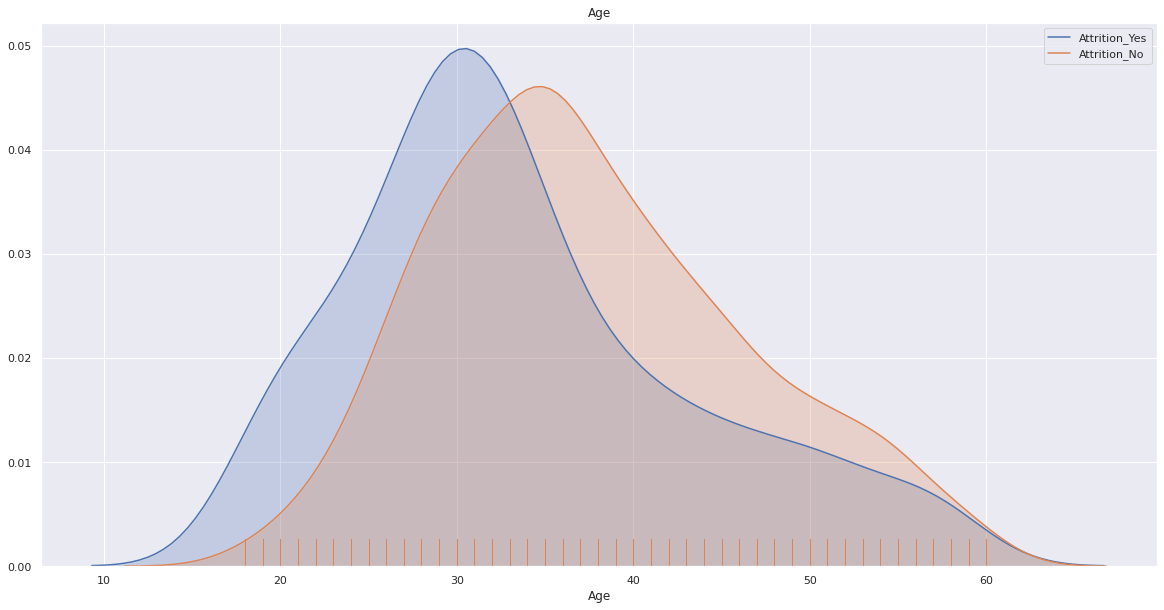

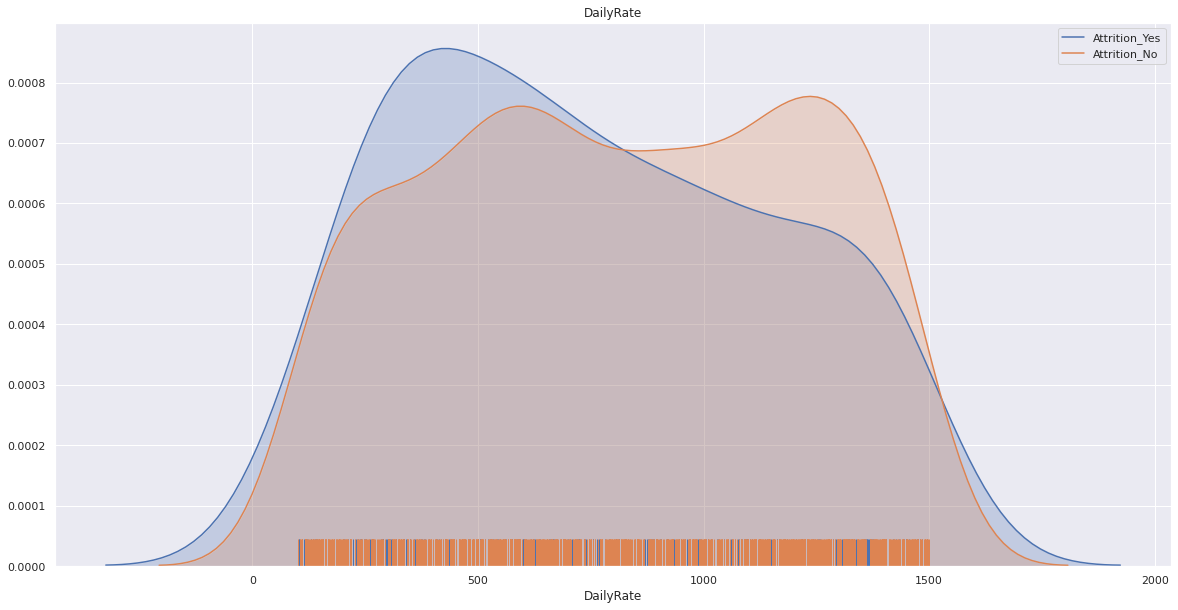

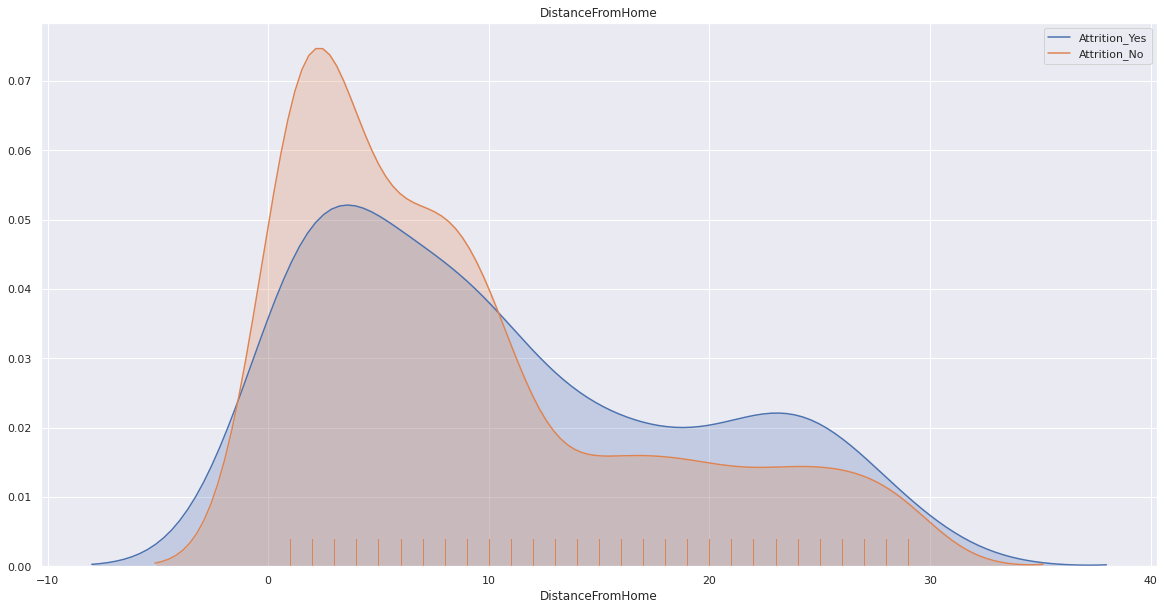

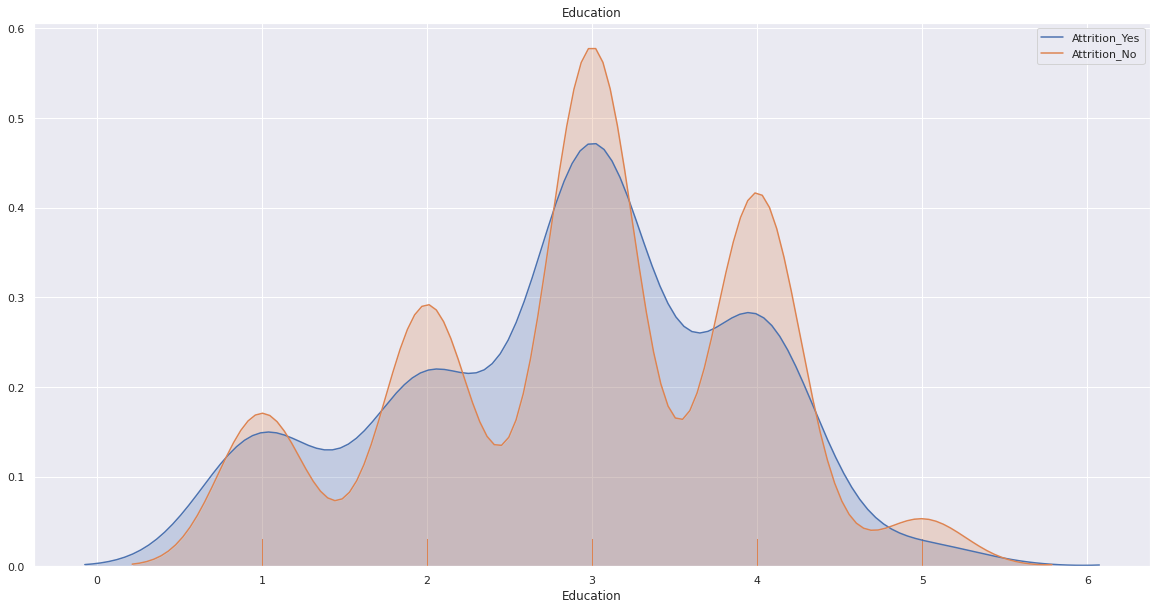

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


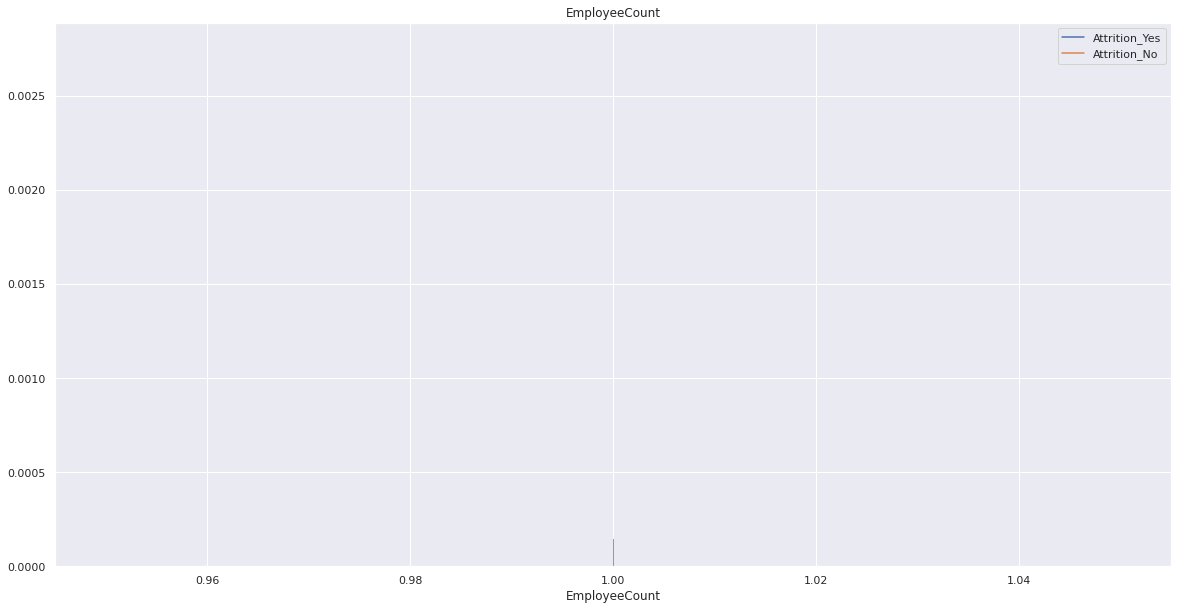

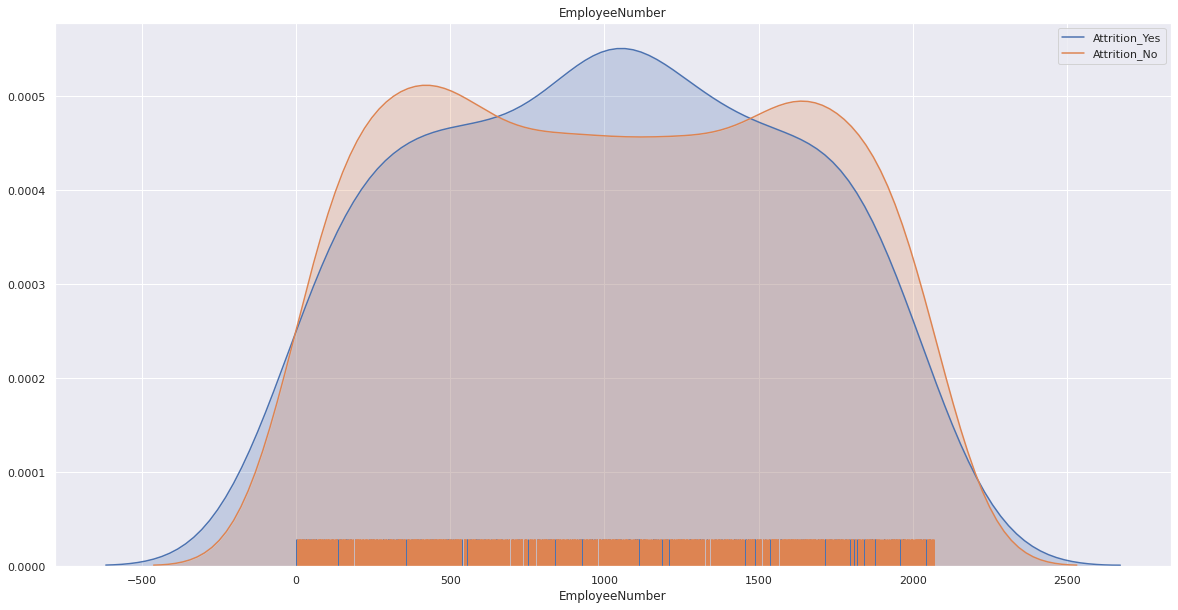

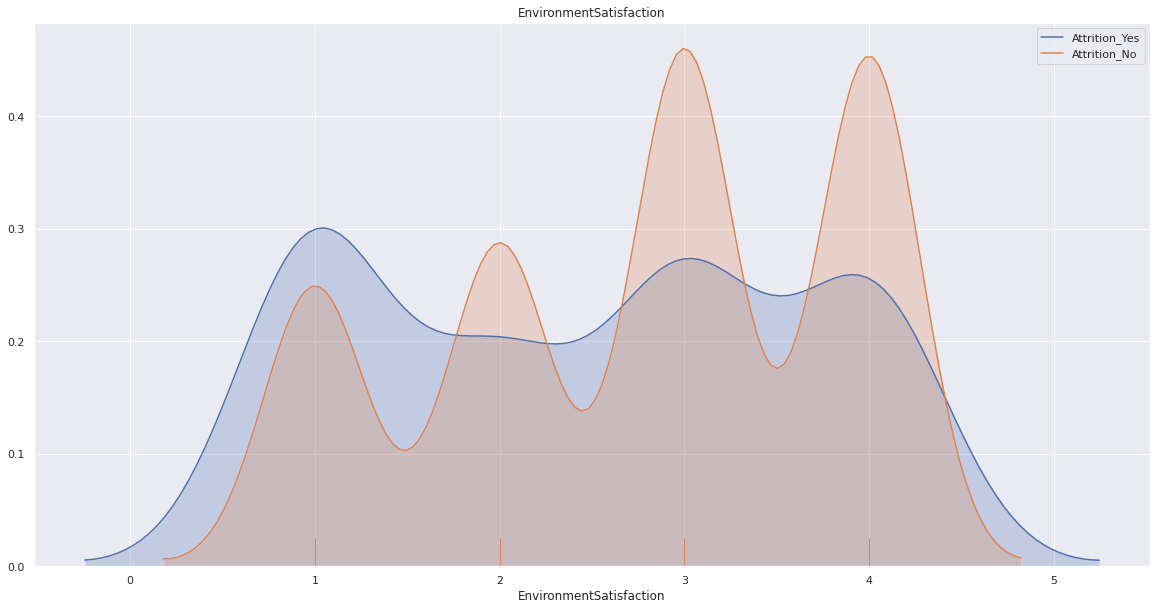

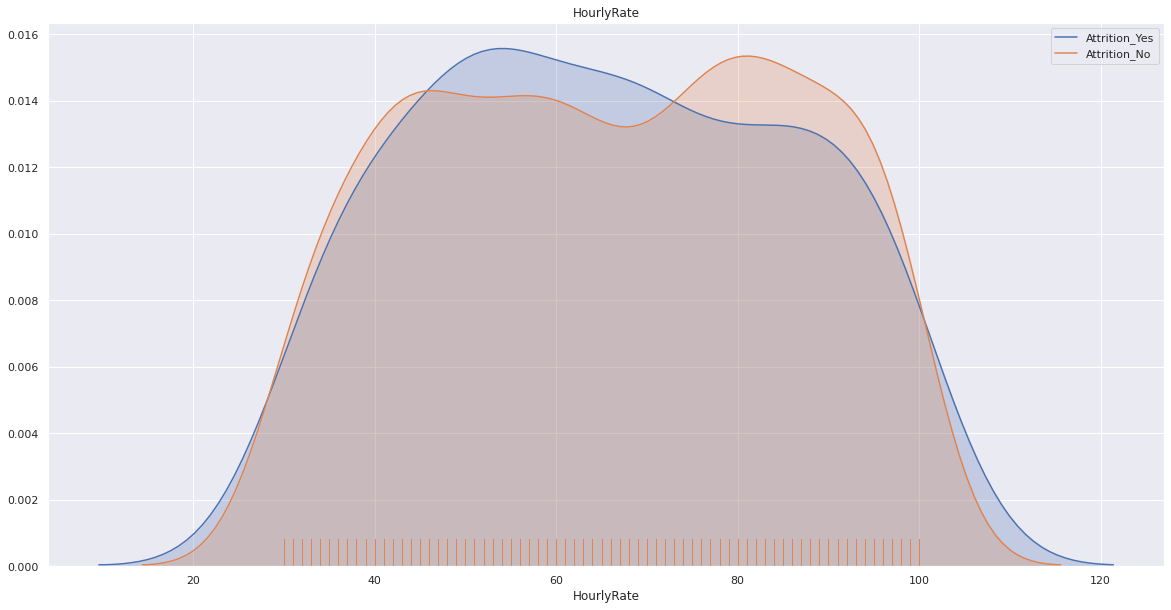

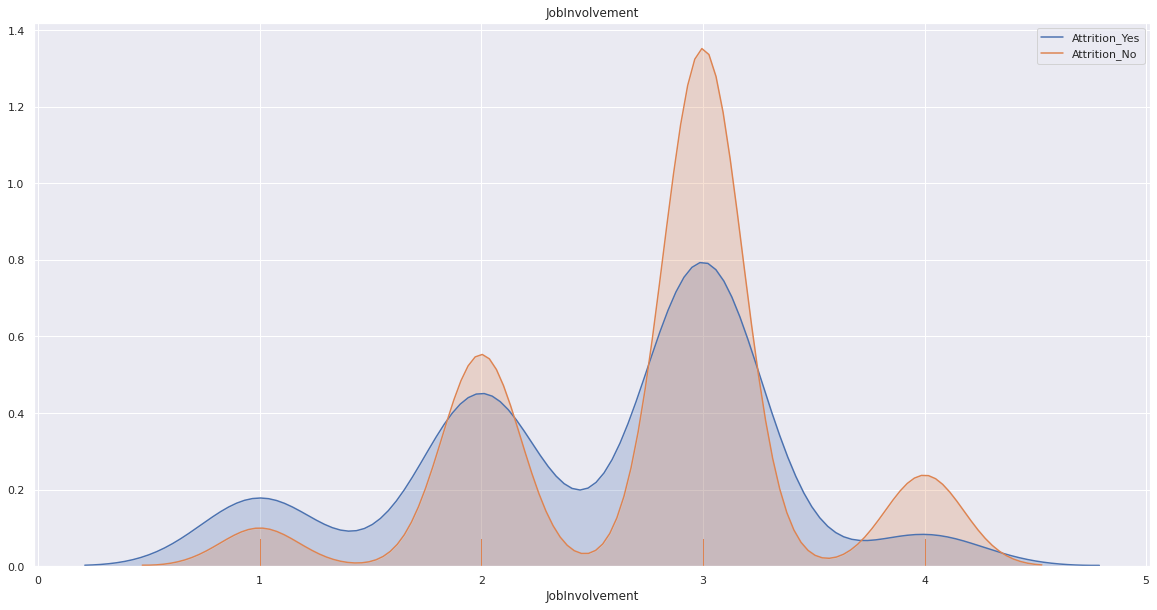

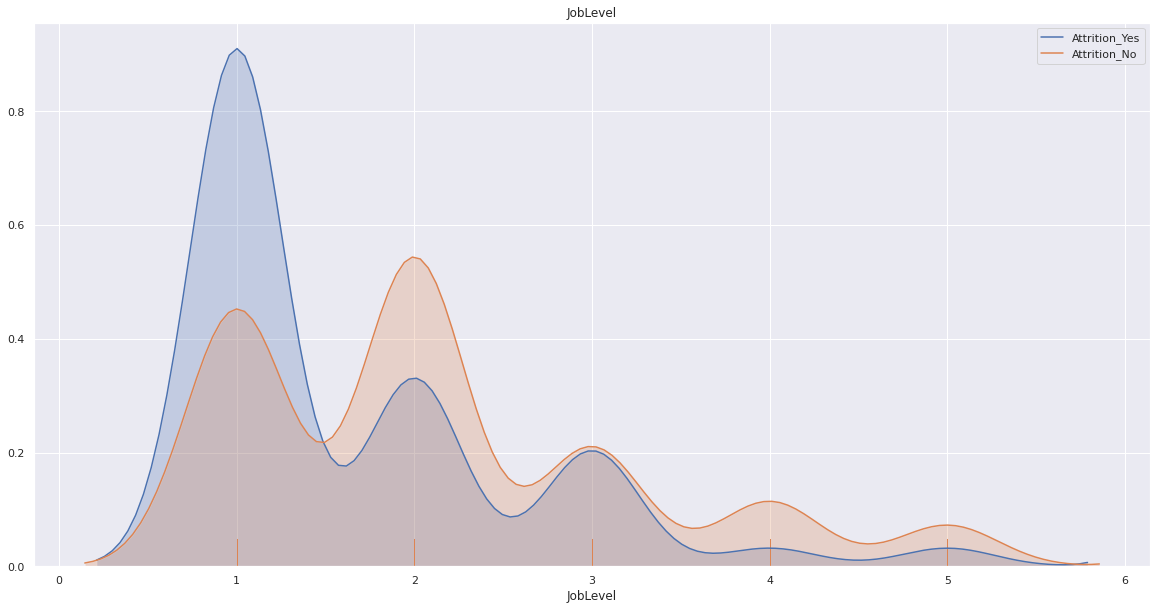

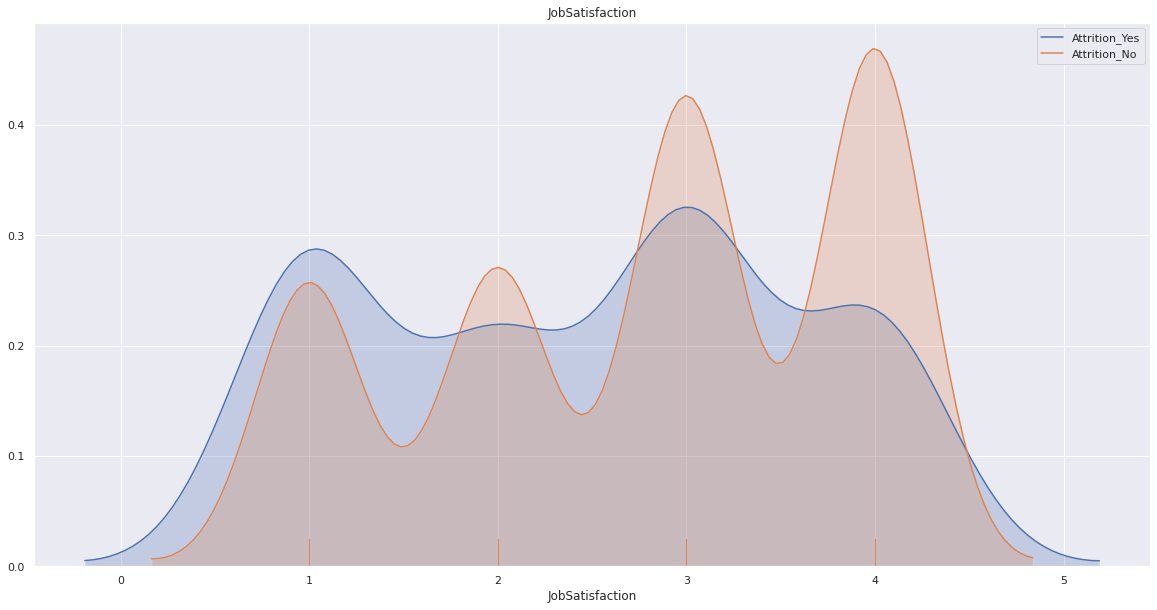

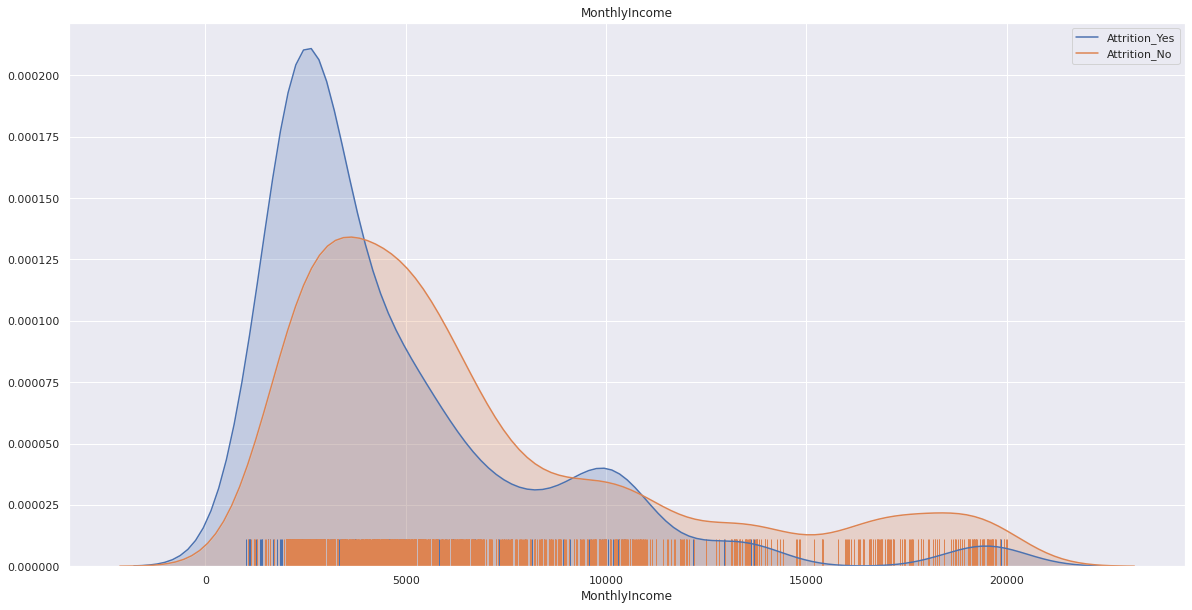

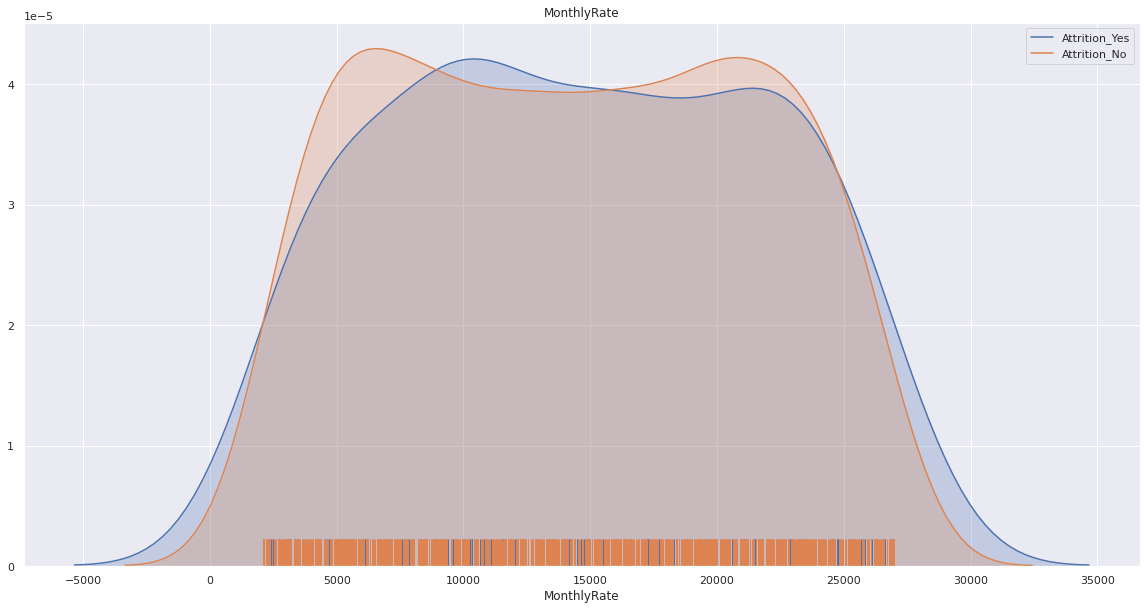

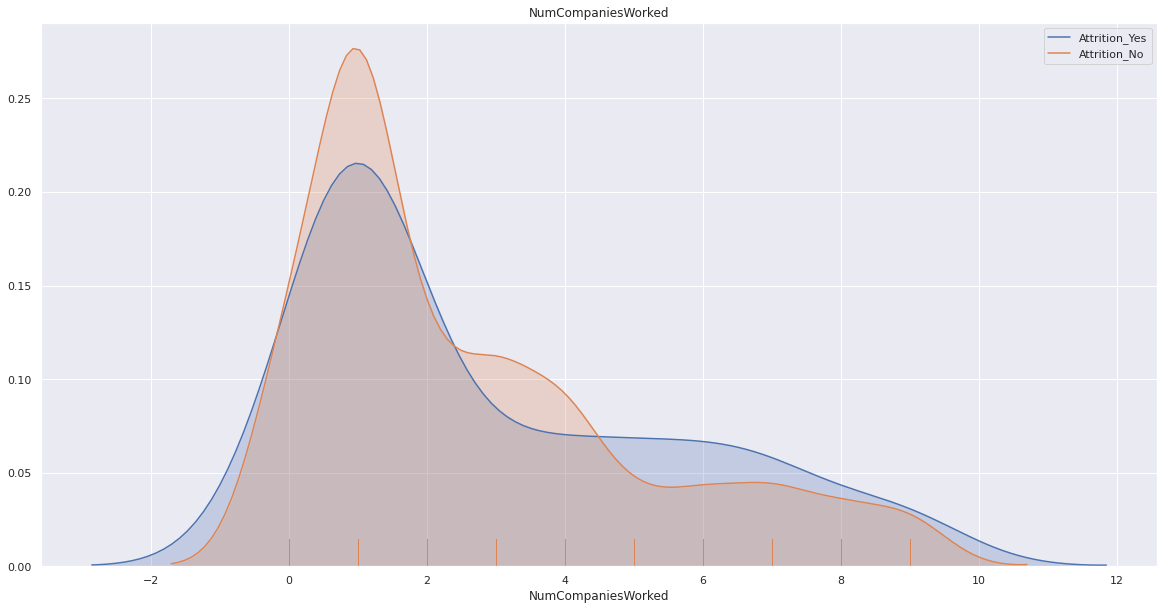

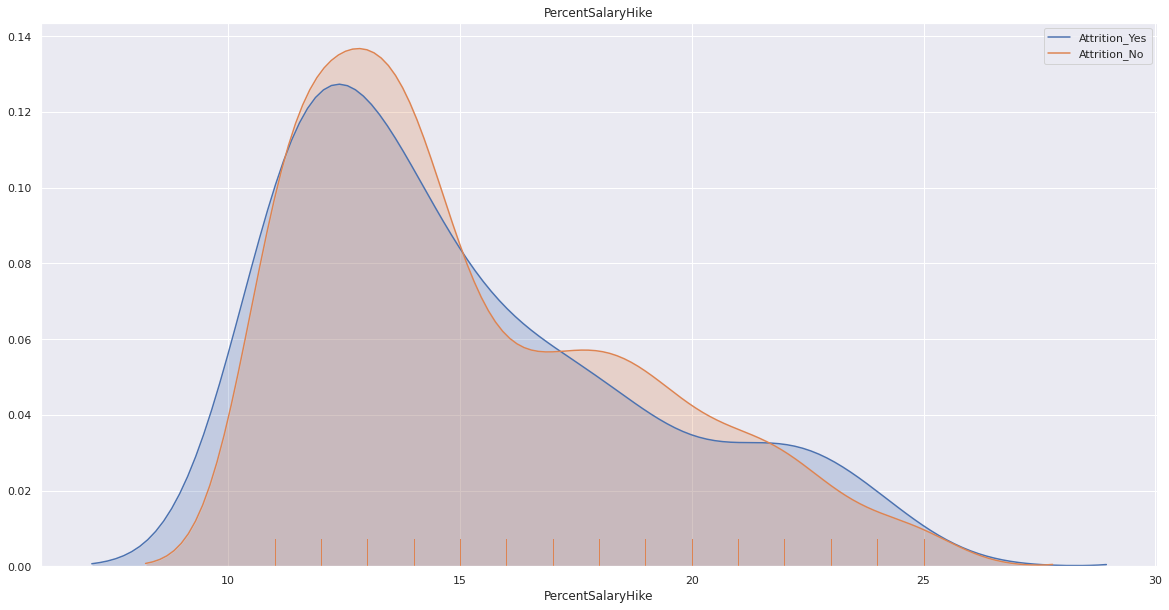

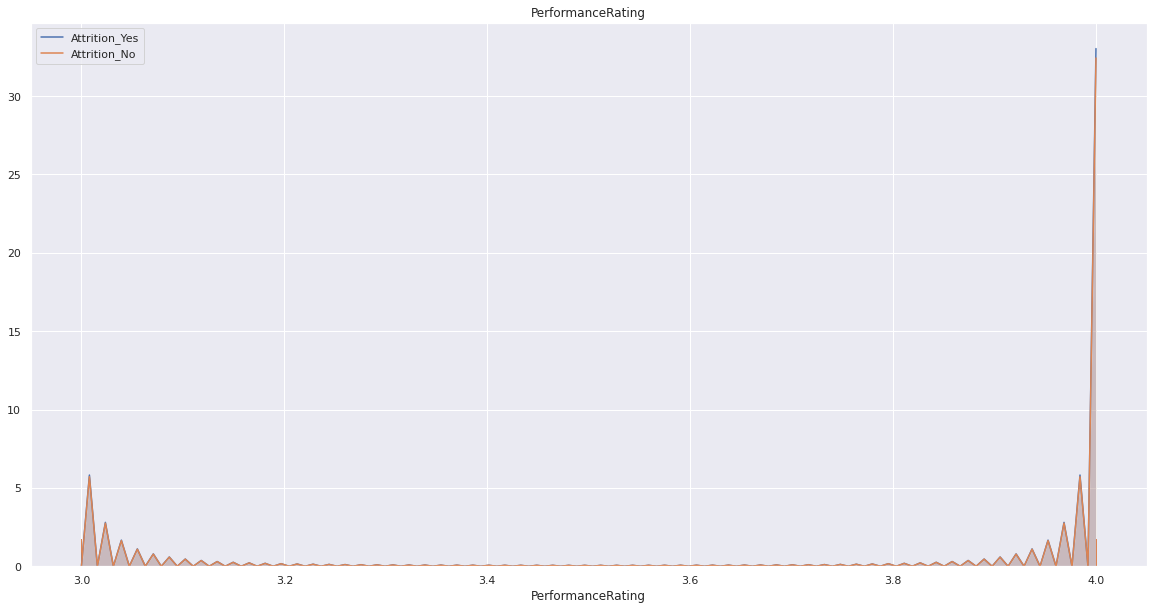

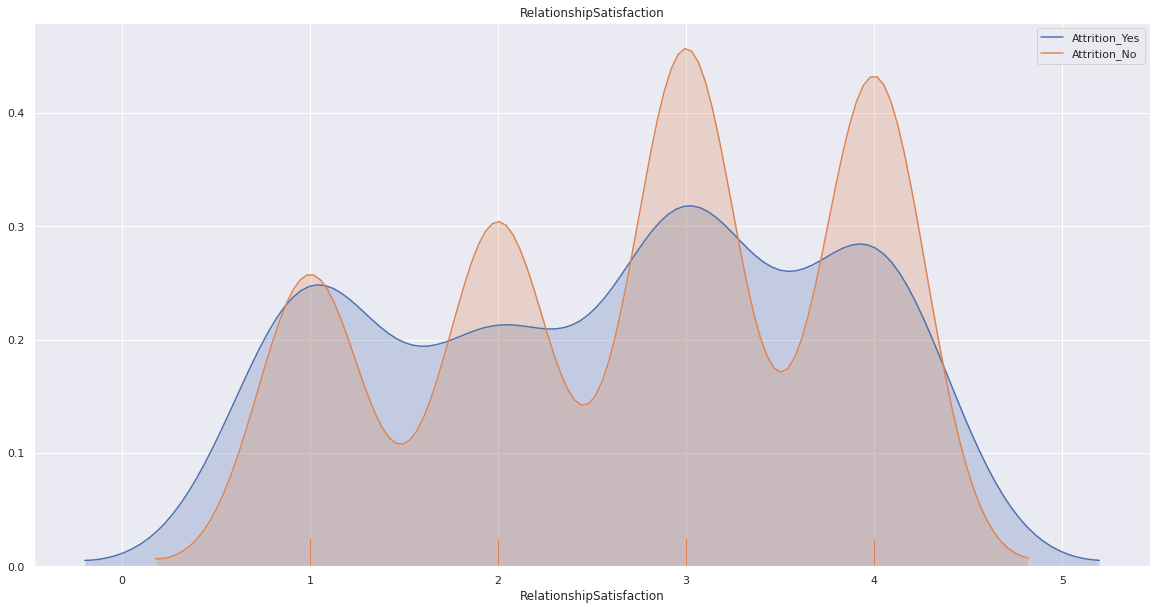

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


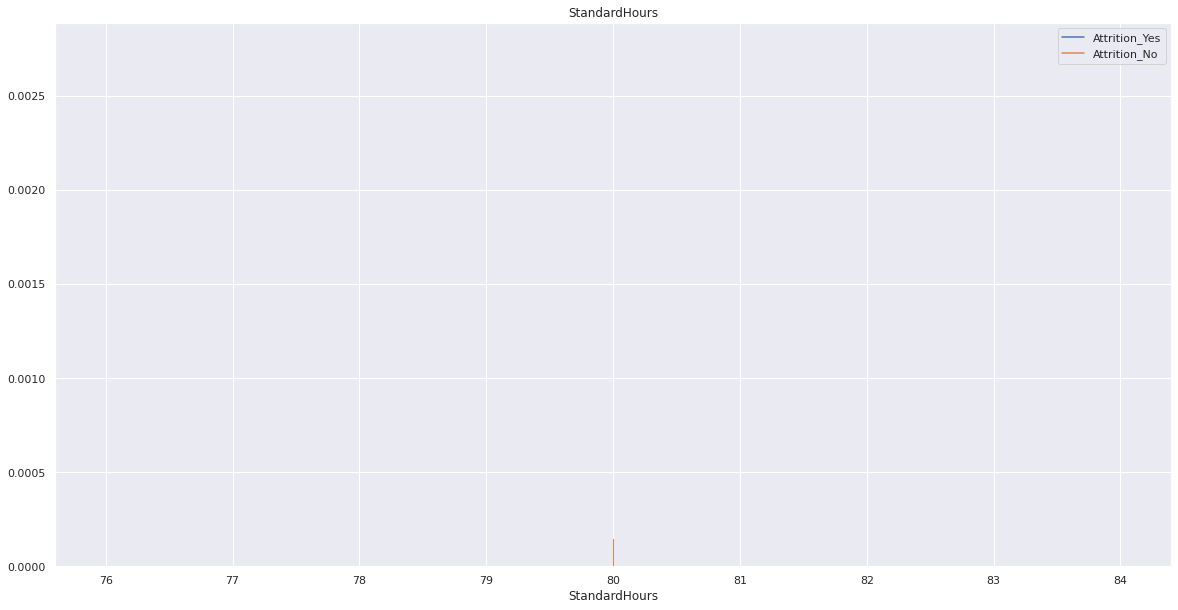

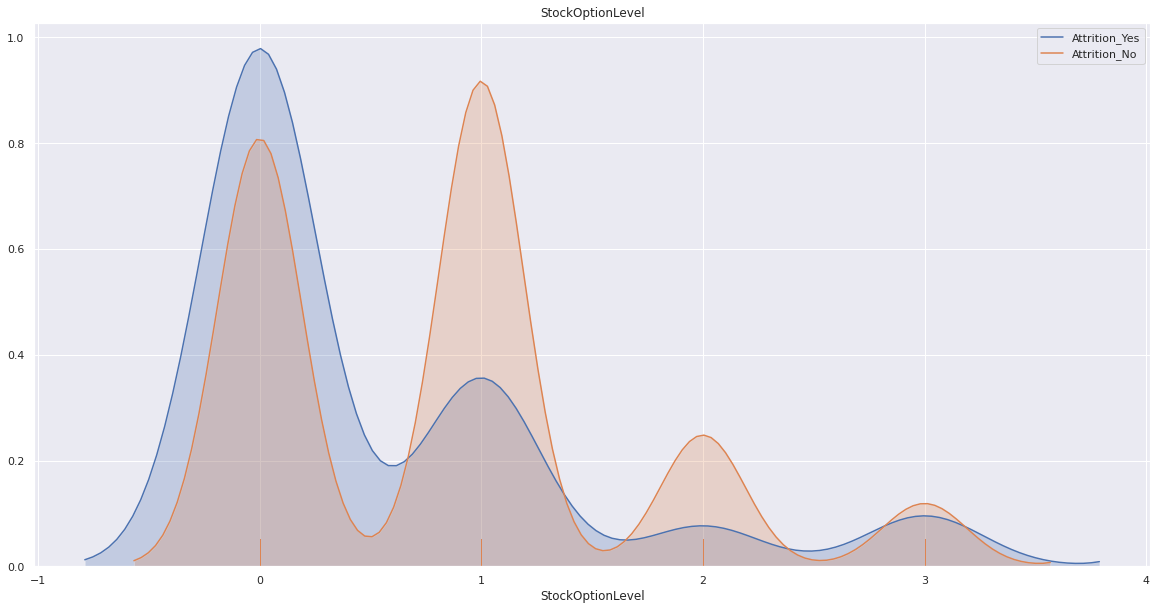

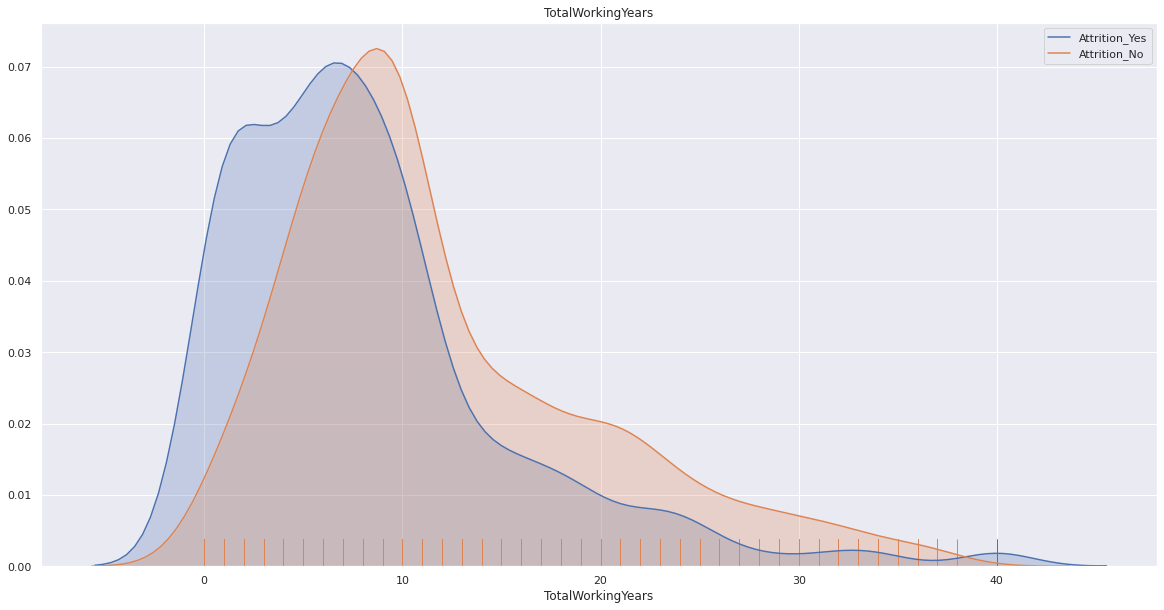

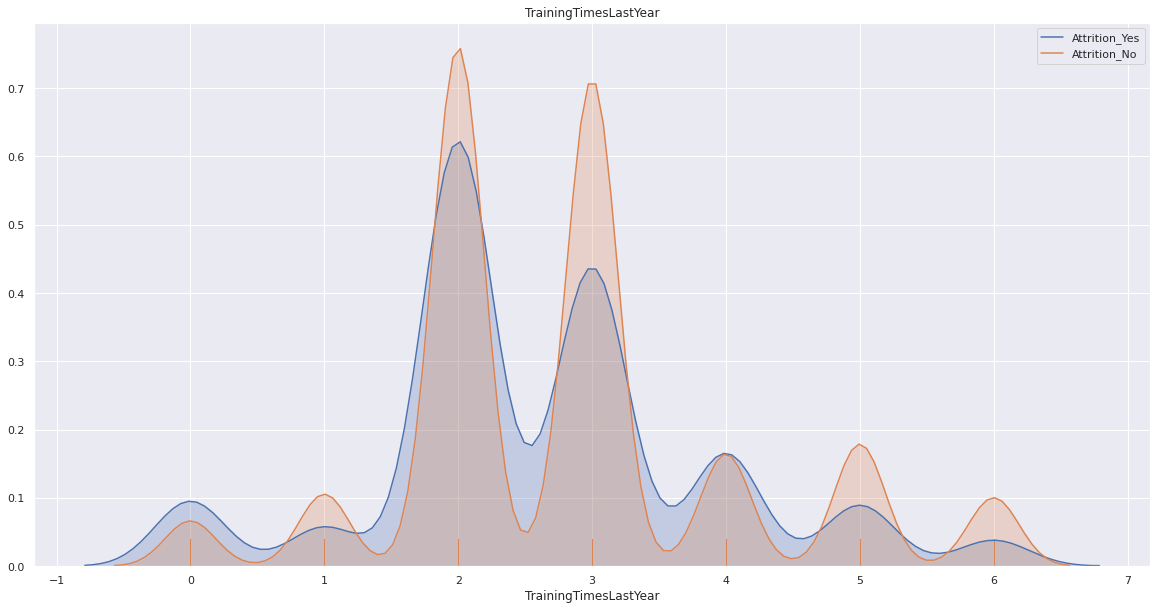

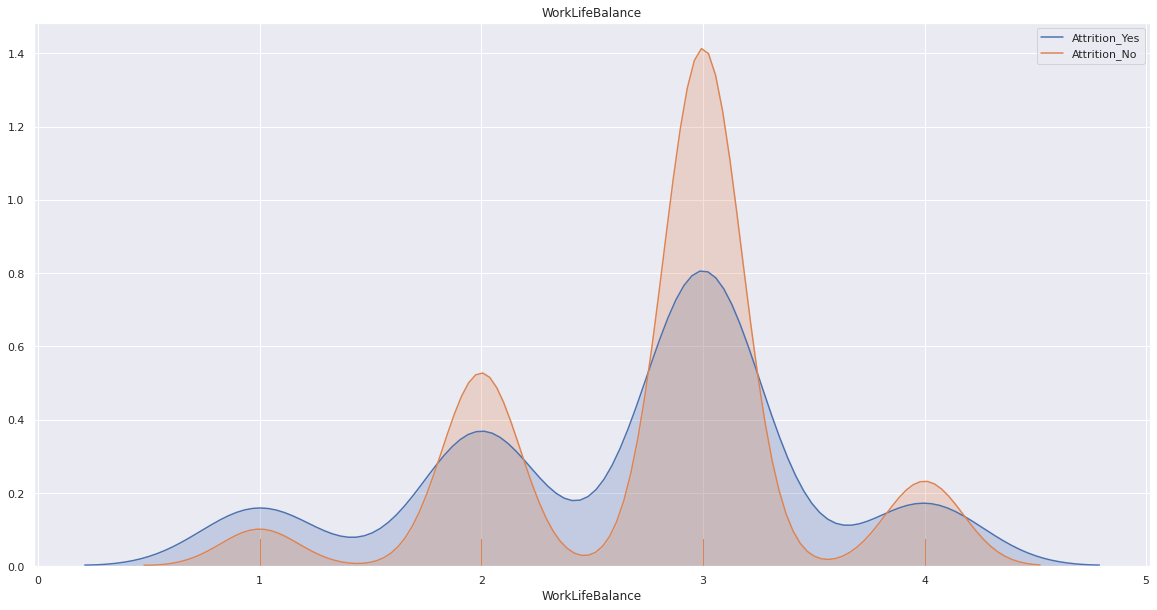

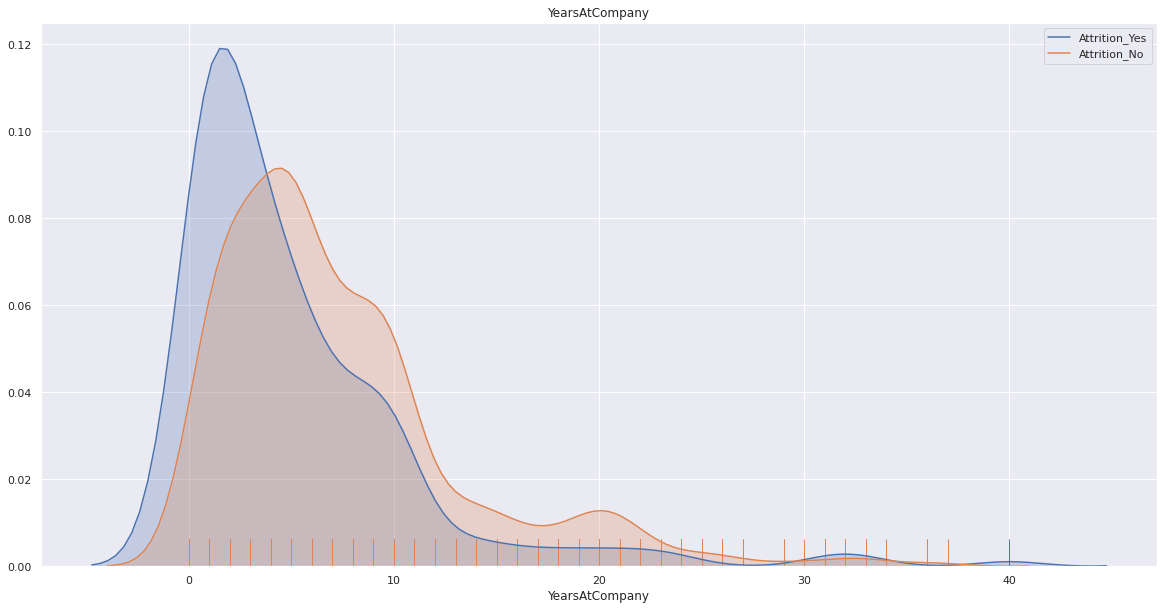

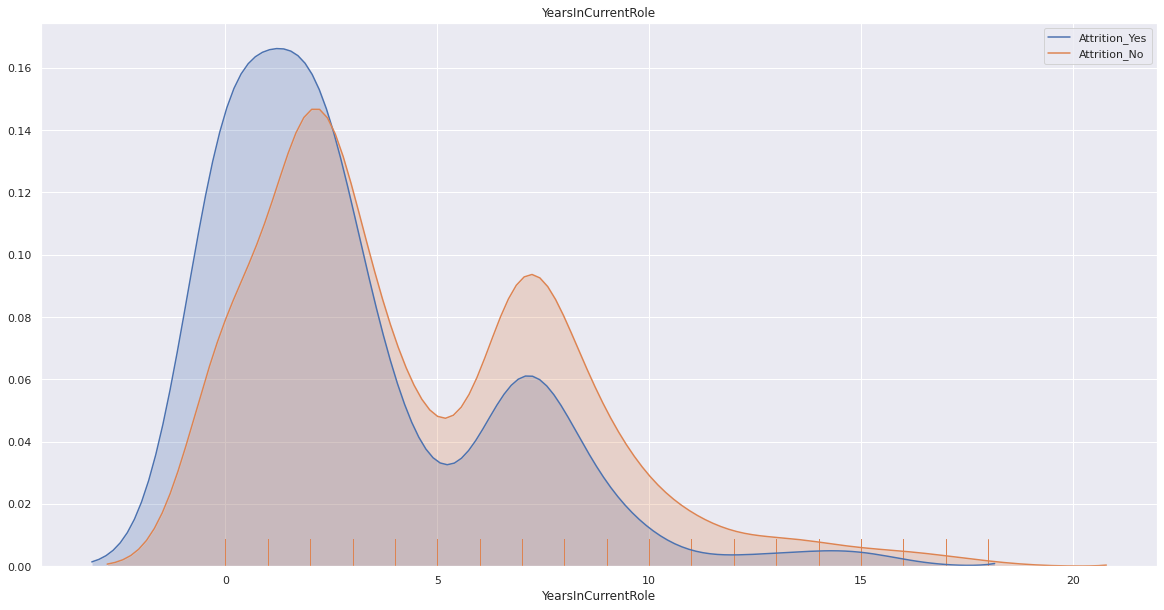

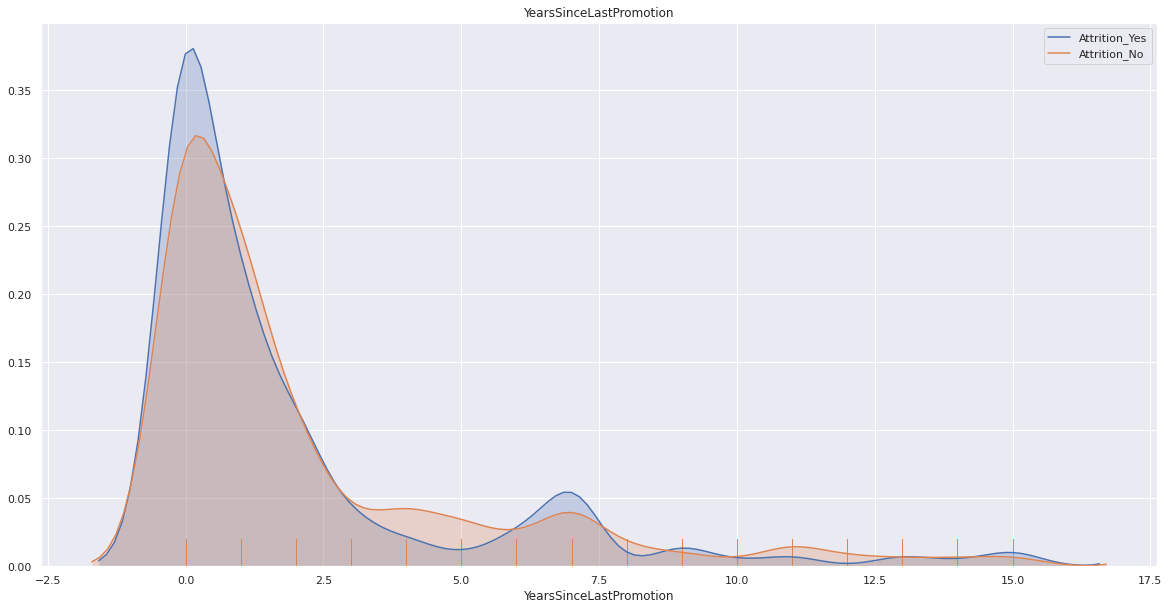

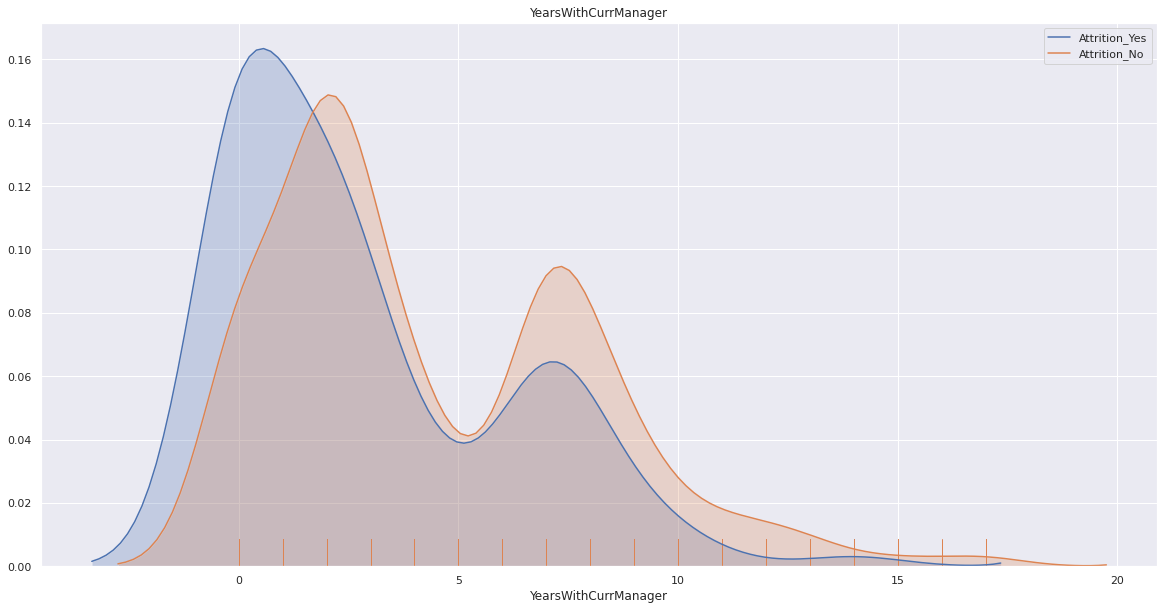

In [13]:
for col in numerical:
     distribution_plot(df, col, 'Attrition')

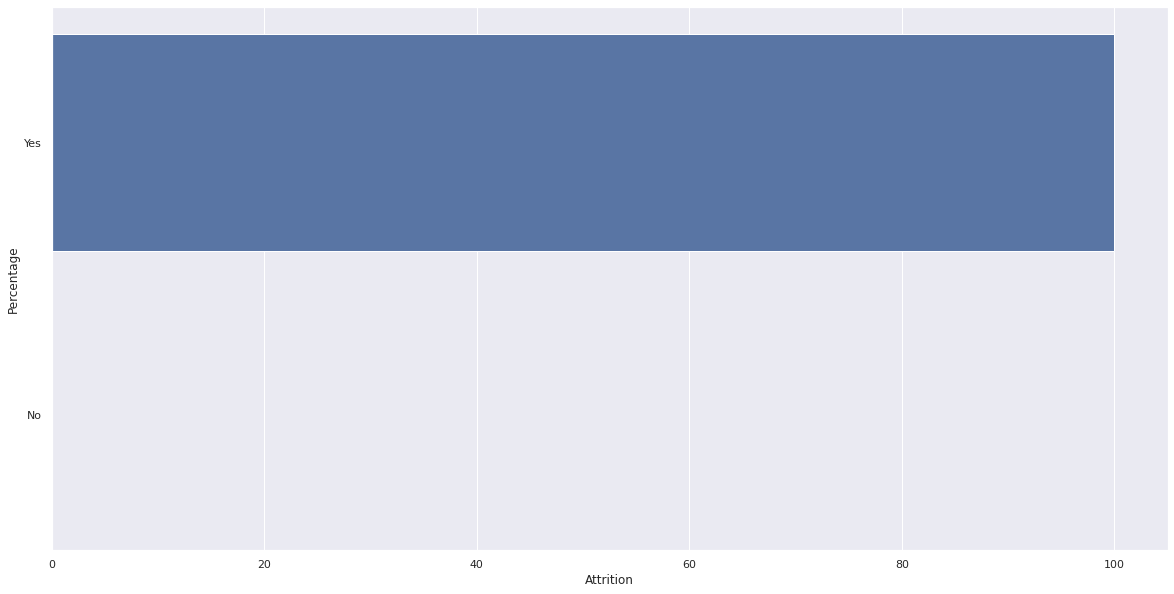

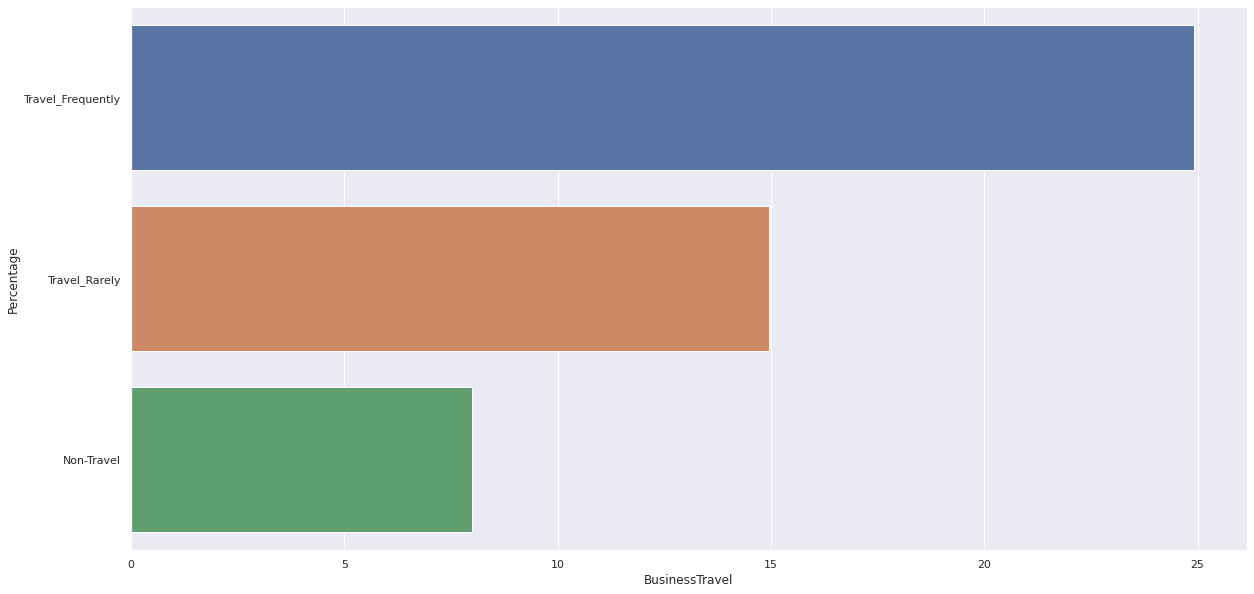

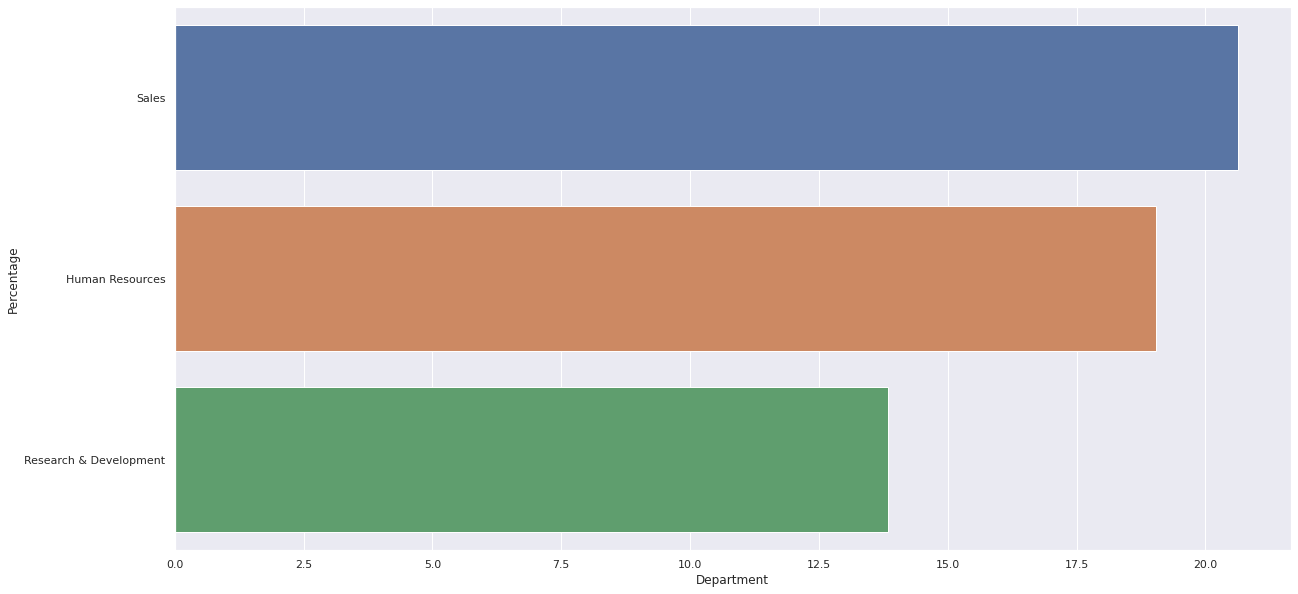

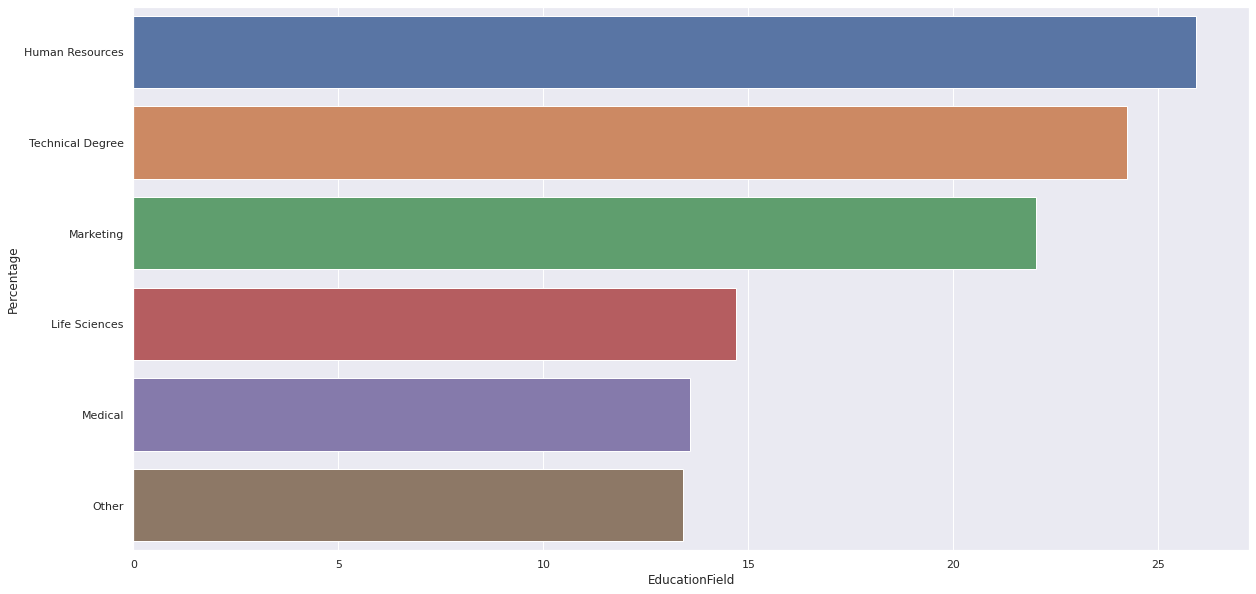

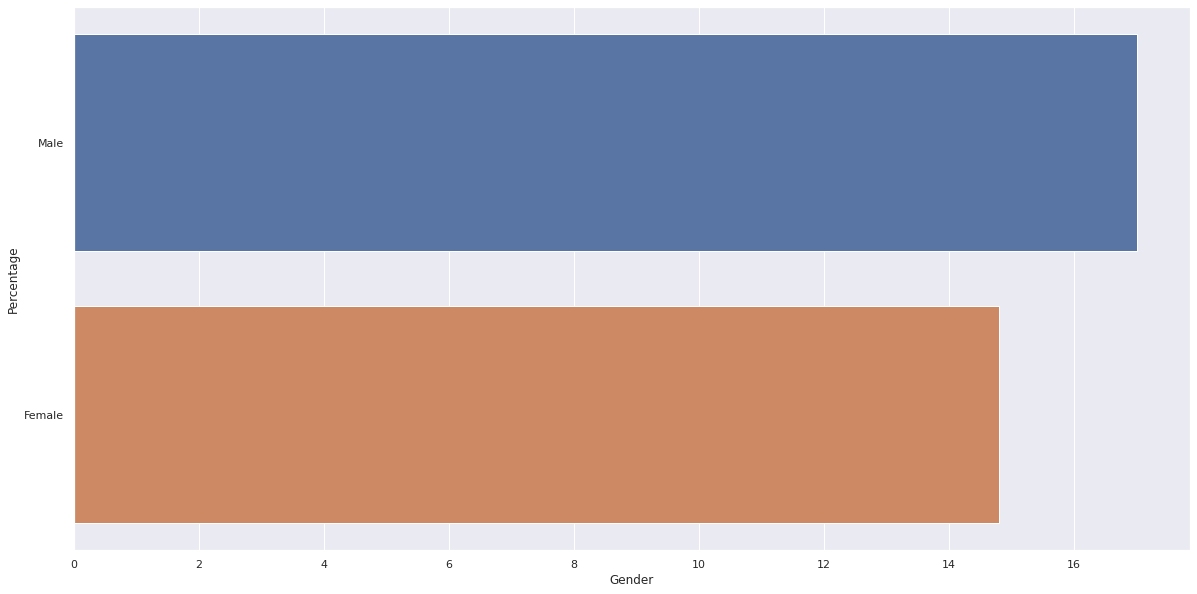

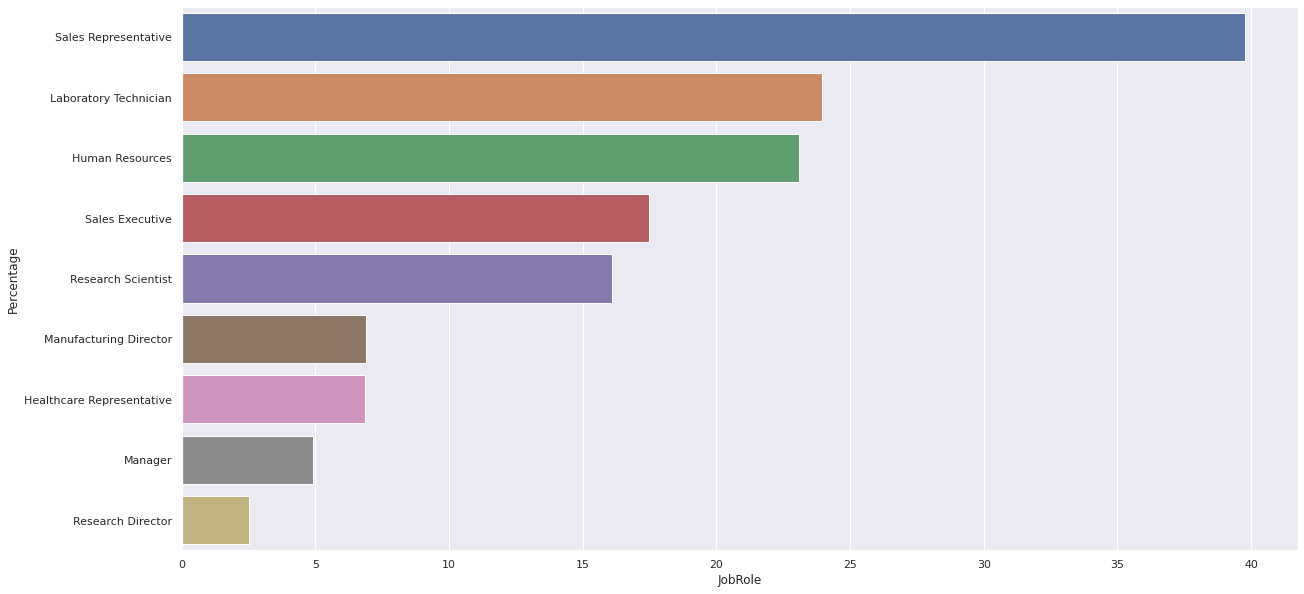

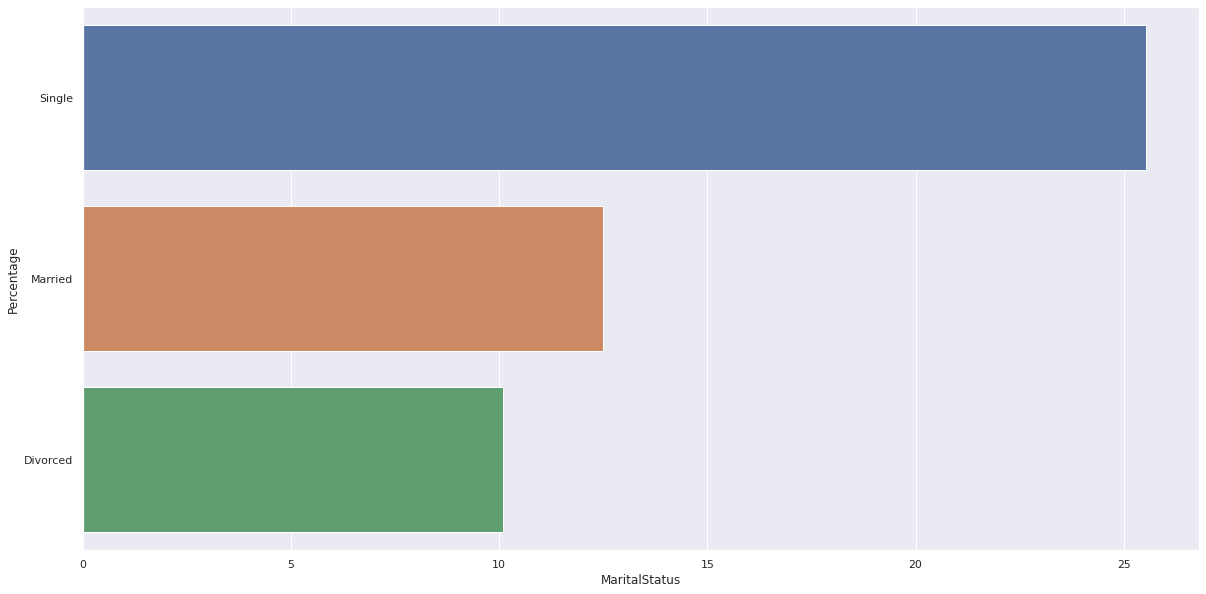

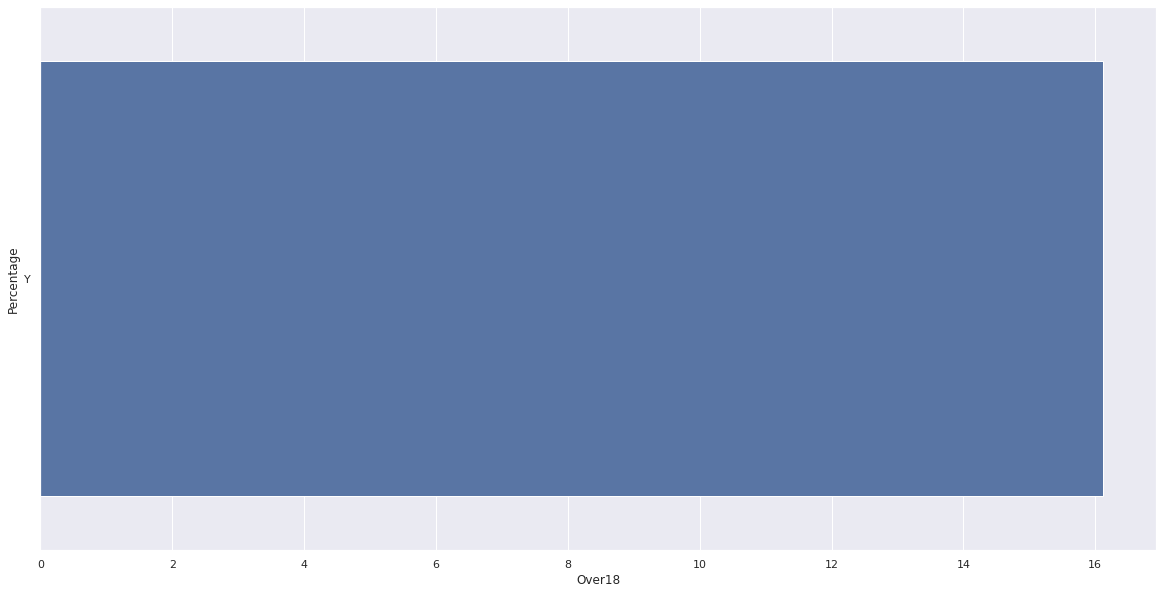

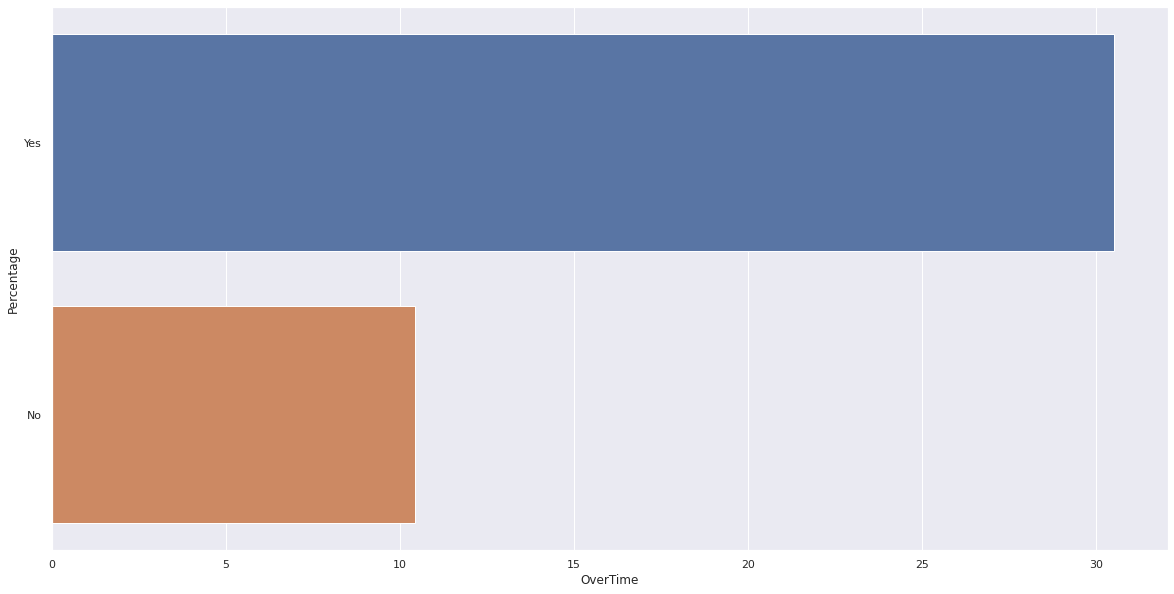

In [14]:
# Plot all category features
for col in categorical:
     Percantage_cat_plot(df, col, 'Attrition')

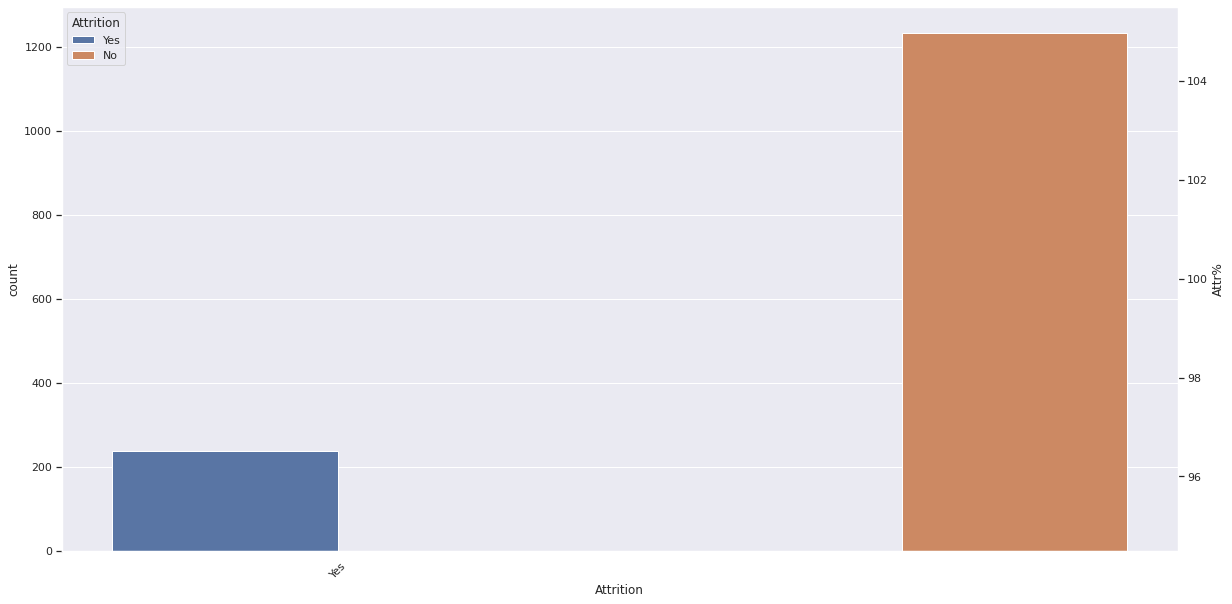

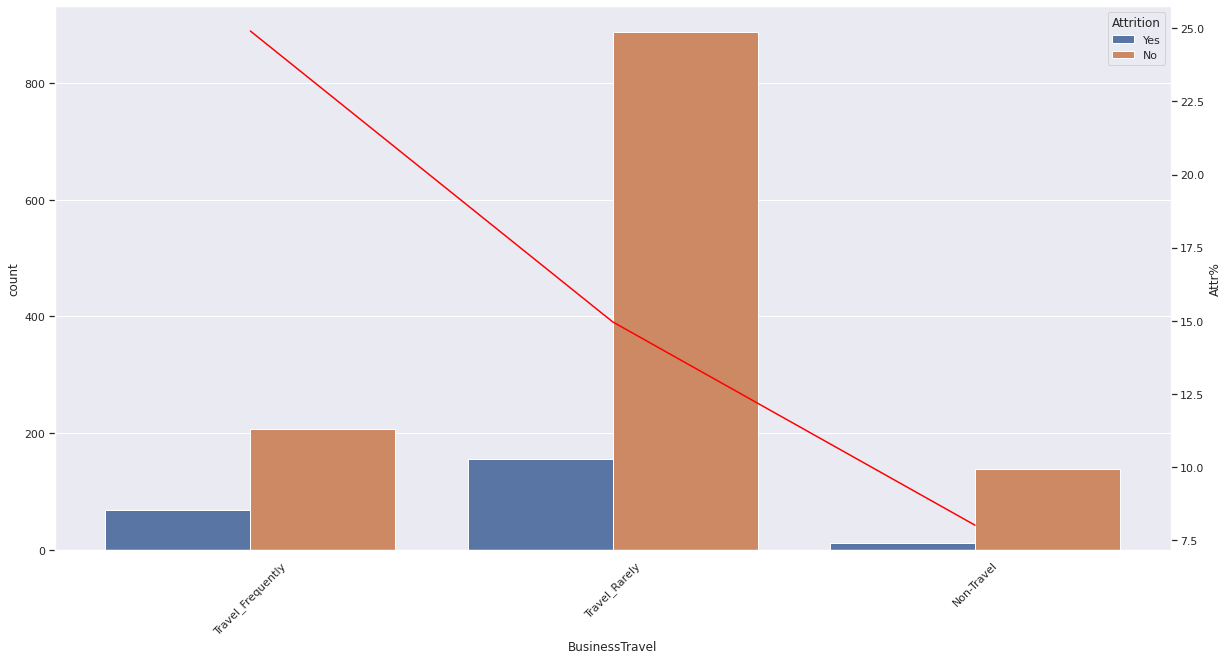

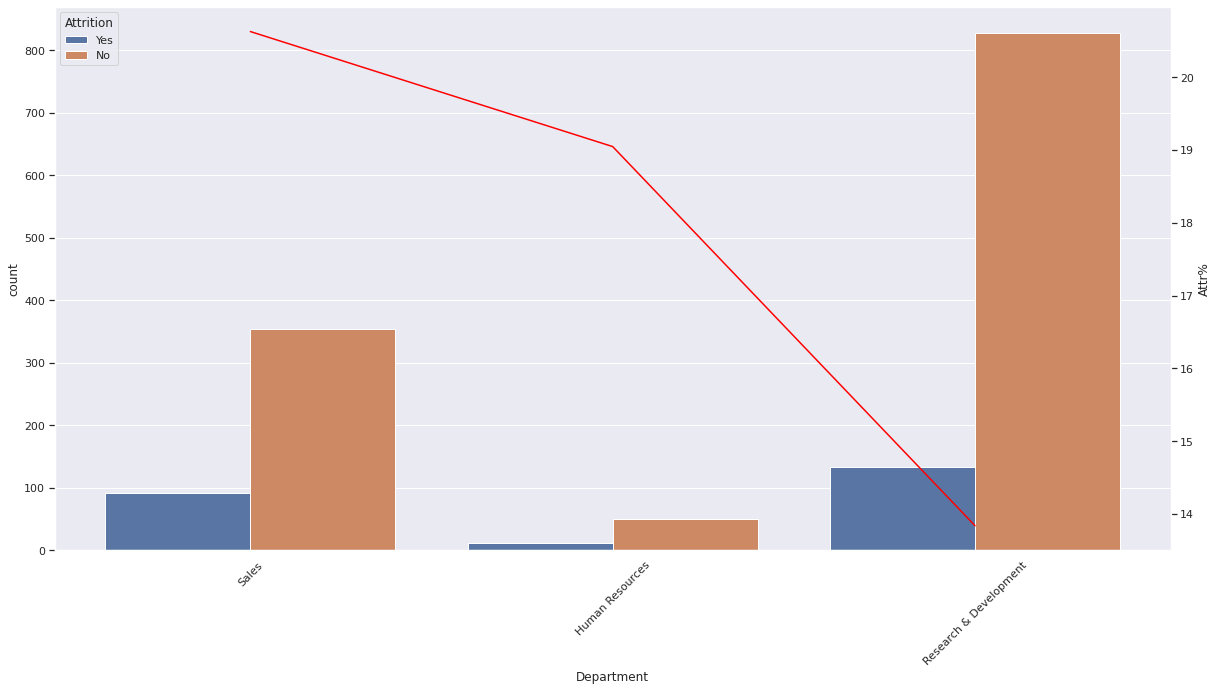

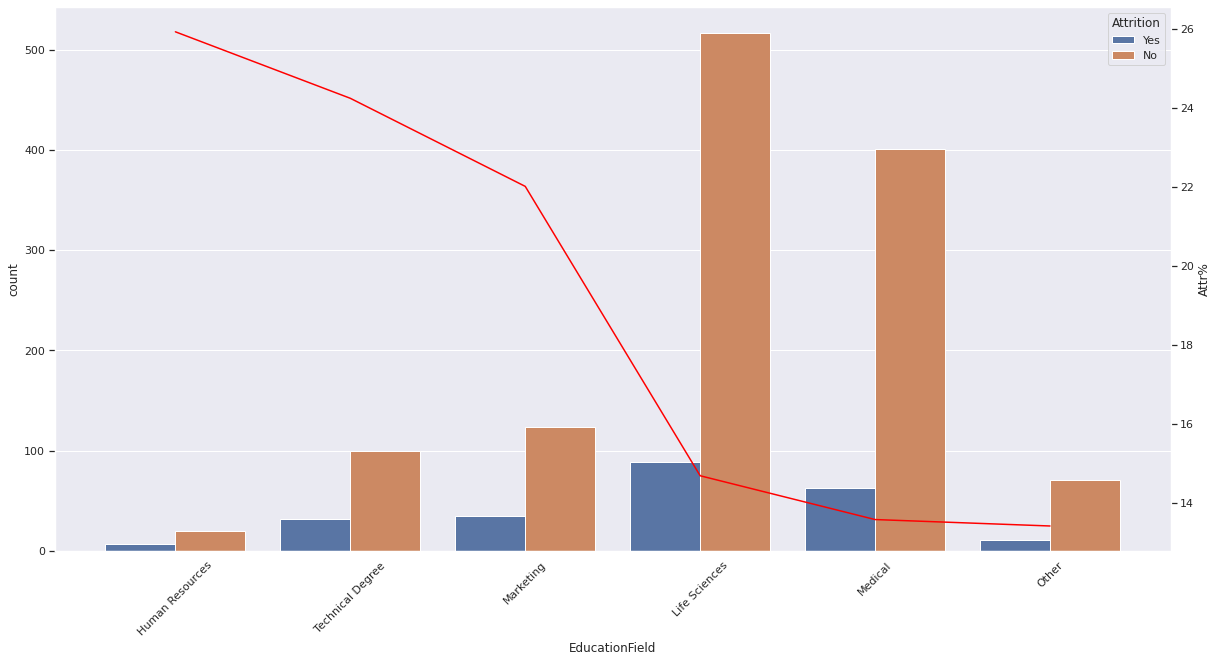

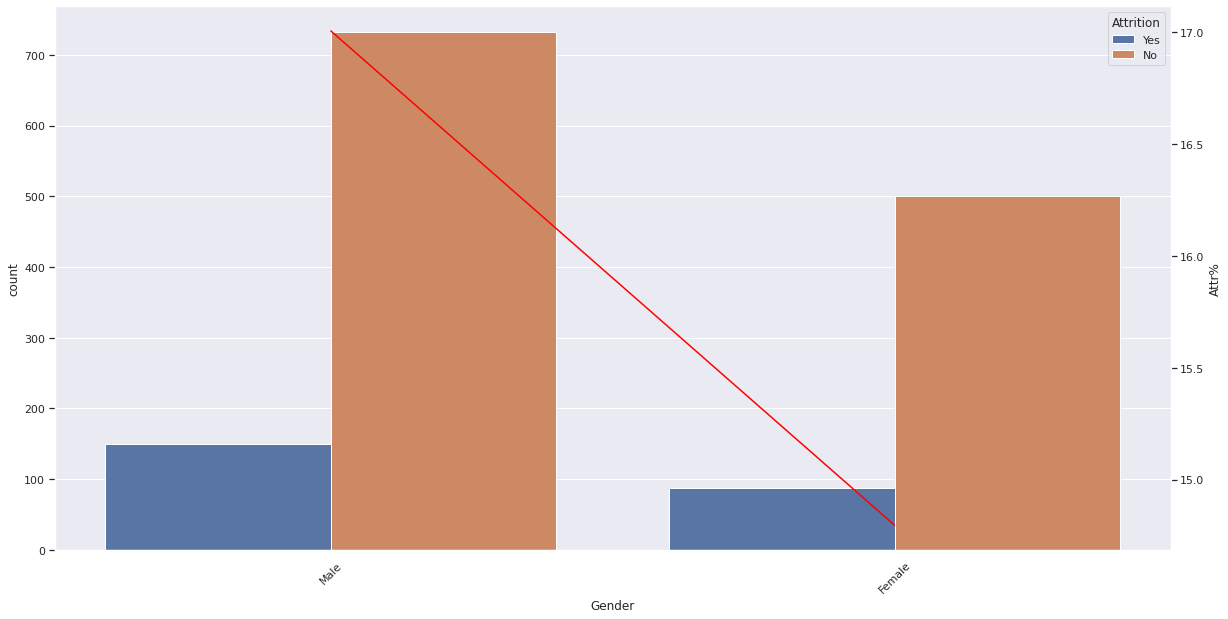

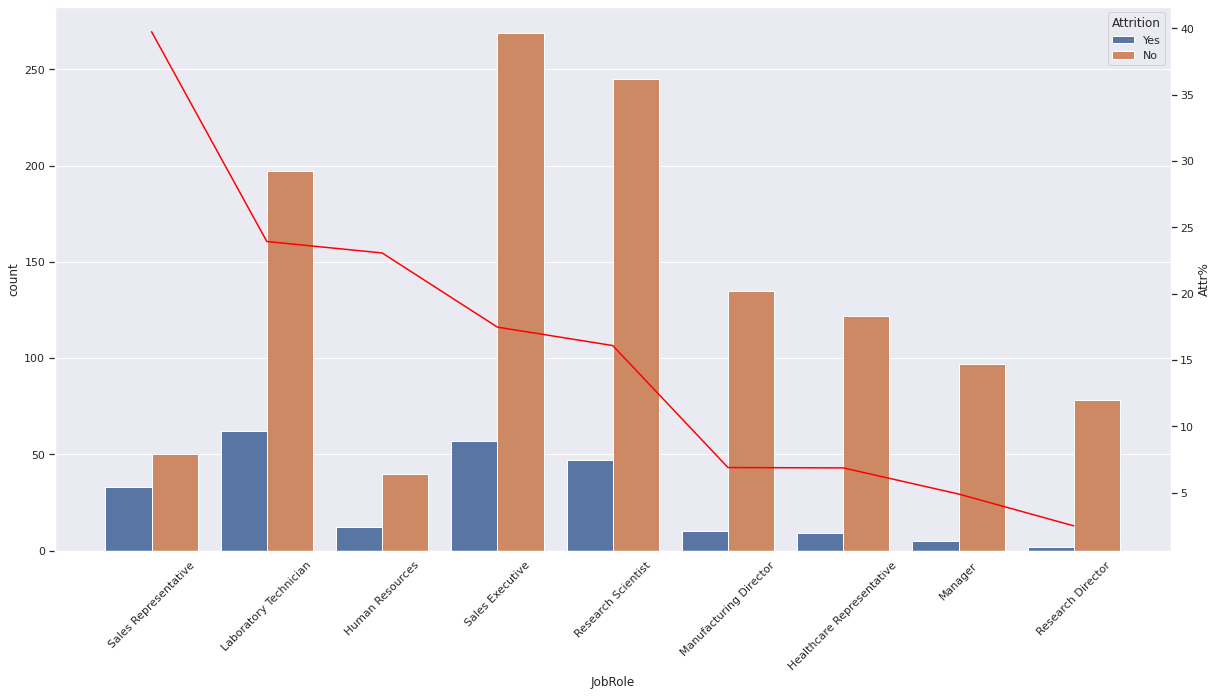

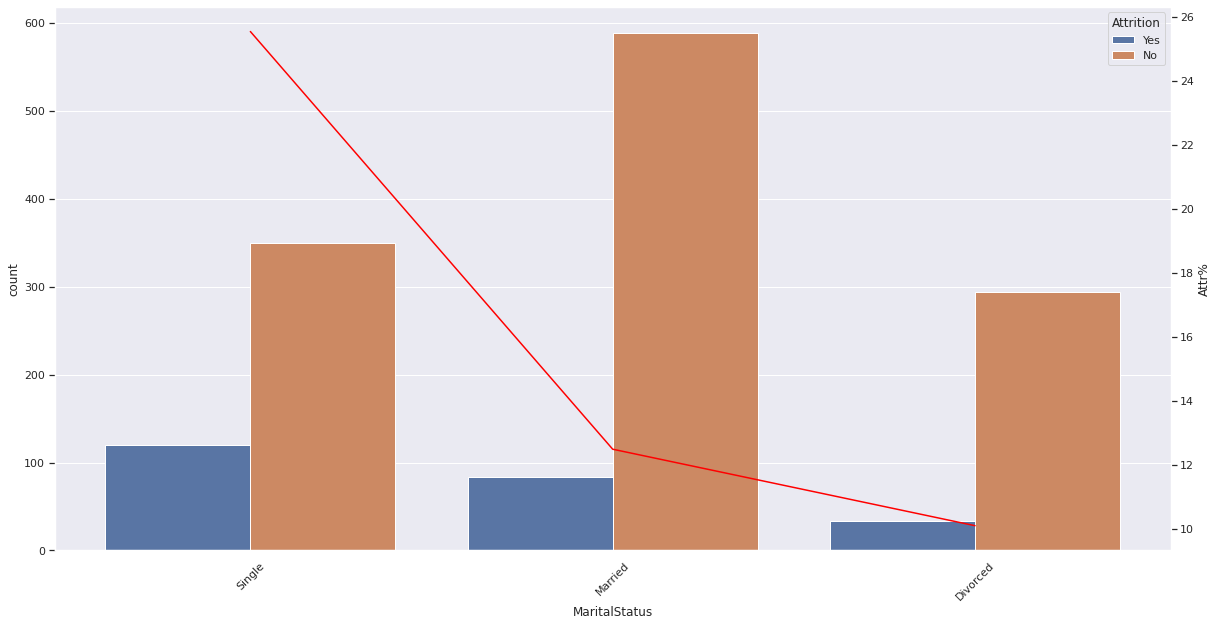

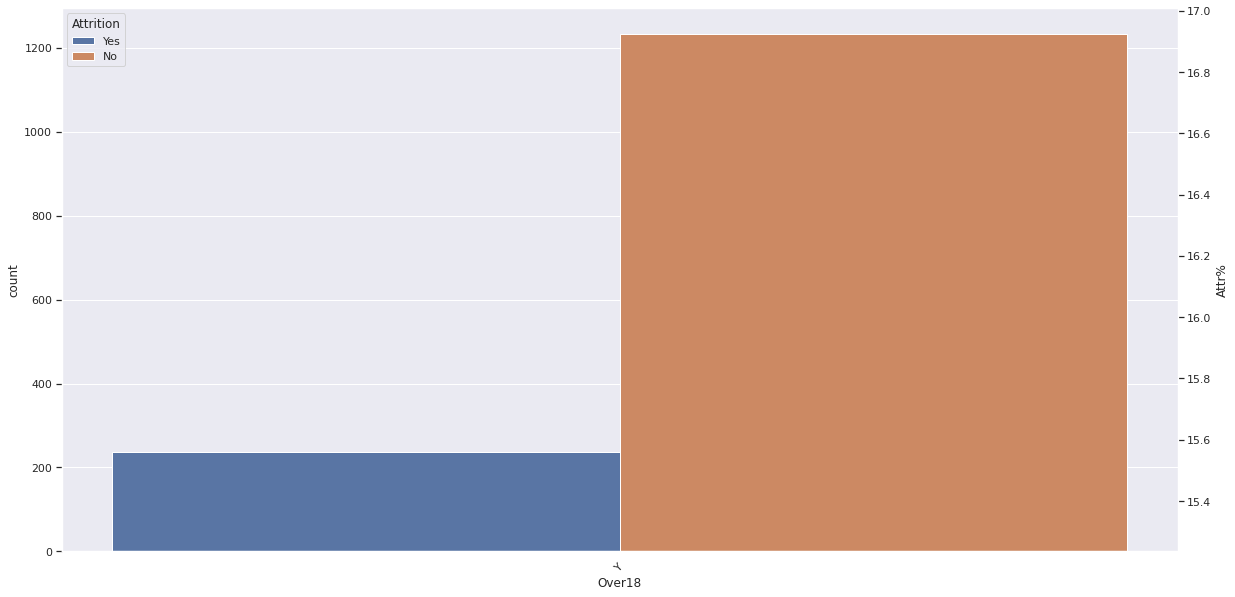

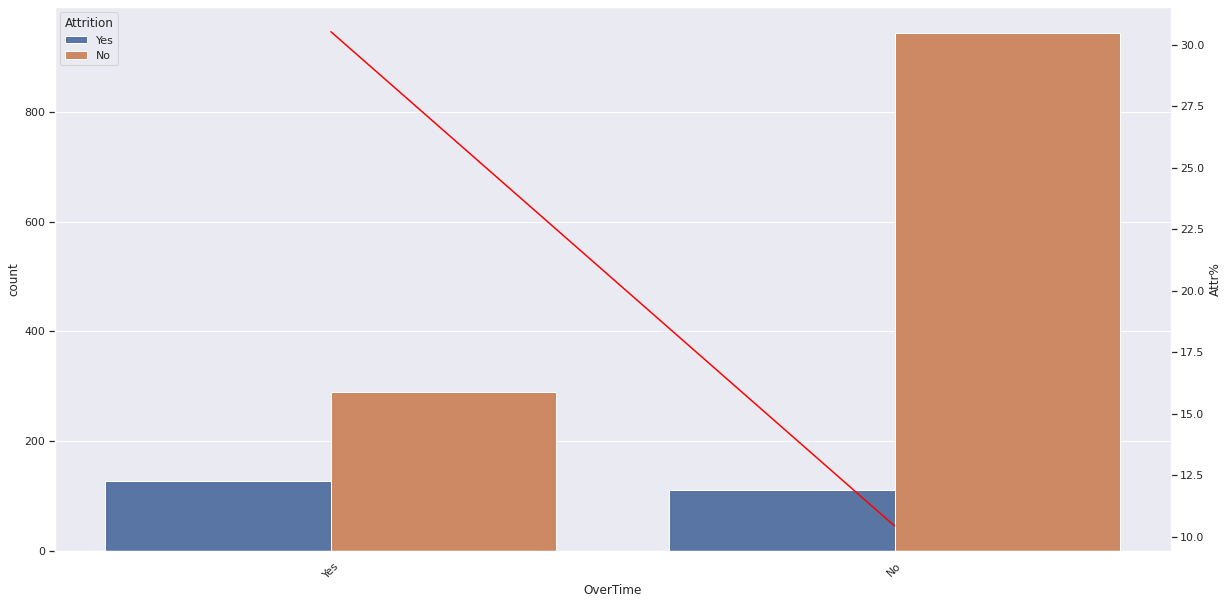

In [15]:
for col in categorical:
     cat_plot(df, col, 'Attrition')

## 2.3.Drop some unnecessary features
From the kde plot, we will see some features that all values are the same or not necessary data.

In [16]:
# drop useless features (std = 0 or frequency = 1470)
df = df.drop(columns=['StandardHours', 'EmployeeCount', 'Over18', 'EmployeeNumber'])

In [17]:
# sns.pairplot(df, hue="Attrition")

# 3.Features Engineering
Feature engineering is process to create new features and relationships from the current features that we have. In addition, this process include numerically encoding the categorical values in our dataset to perpare for machine learning. 

In [18]:
# Create list to store columns with categorical data and numerical data
categorical = []
for col, value in df.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

# Store the numerical columns in a list numerical
numerical = df.columns.difference(categorical)

In [19]:
# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
df["Attrition"] = df["Attrition"].apply(lambda x: target_map[x])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [20]:
# Define a dictionary for the target mapping
#OverTime_map = {'Yes':1, 'No':0}
#Gender_map = {'Male':1, 'Female':0}
# Use the pandas apply method to numerically encode our attrition target variable
#df["OverTime"] = df["OverTime"].apply(lambda x: OverTime_map[x])
#df["Gender"] = df["Gender"].apply(lambda x: Gender_map[x])
#df.head()

## 3.1.Drop colinear features

By plotting a correlation matrix, we can see overview of how the features are related to one another.

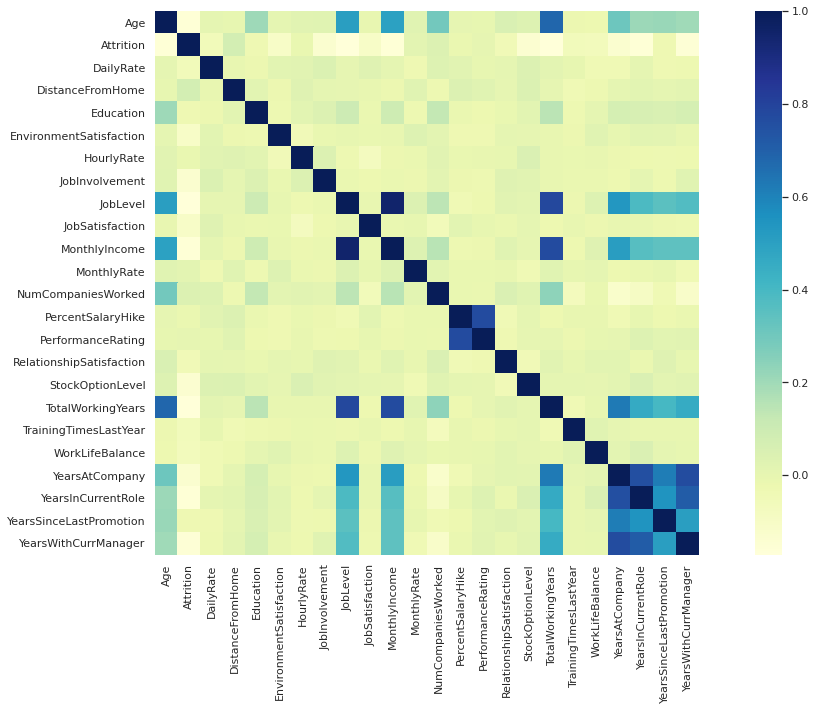

In [21]:
# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots(figsize=(20, 10))
#creating a correlation matrix
correlations_ps = df.corr()
sns.heatmap(correlations_ps,square = True, cmap = "YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In order to accurate our machine learning model, we need to drop features that highly related to one another because redundant features can decrease model performance.

In [22]:
df = pd.concat([df['MonthlyIncome'], df.drop('MonthlyIncome',axis=1)], axis=1)

In [23]:
# Set correlation threshold
threshold = 0.5
to_drop = []
# Absolute value correlation matrix
corr_matrix = df.corr().abs()
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

for column in upper.columns:
    if any(upper[column].values > threshold):
        print(column)
        to_drop.append(column)

JobLevel
PerformanceRating
TotalWorkingYears
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [24]:
# Drop all colinear features except MonthlyIncome because some intersting information in distribution plot
#to_drop.remove('MonthlyIncome')
df_drop = df.drop(columns = to_drop)

In [25]:
# Check columns
df_drop.columns

Index(['MonthlyIncome', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance'],
      dtype='object')

## 3.2.Encode categorical features

In [26]:
# Create new list to store columns with categorical data and numerical data after drop some features
categorical = []
for col, value in df_drop.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

# Store the numerical columns in a list numerical
numerical = df_drop.columns.difference(categorical)

In [27]:
# Store the categorical data in a dataframe called attrition_cat
df_cat = df_drop[categorical]
#df_cat = df_cat.drop(['Attrition'], axis=1) # Dropping the target column

In [28]:
df_cat = pd.get_dummies(df_cat)

In [29]:
df_cat.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [30]:
# Concat the two dataframes together columnwise
df_final = pd.concat([df_drop[numerical], df_cat], axis=1)

# 4.Machine Learning Pipiline
To predict our target that has 'Yes' and 'No' values, we can use many type of machine learning model. In this notebook, we will using Random Forest model and Gradient Boosting model.

## 4.1.Create X and y

In [31]:
# Create X, y for training model
y = df_final['Attrition']
X = df_final.drop(['Attrition'], axis=1) # Dropping the target column

In [32]:
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,4,5993,19479,8,11,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,5130,24907,1,23,4,1,3,3,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,3,2090,2396,6,15,2,0,3,3,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,3,2909,23159,1,11,3,0,3,3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,2,3468,16632,9,12,4,1,3,3,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


## 4.2.Random Forest Model

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
random_state = 0

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


### 4.2.1.Split train set and test set to validate model performance

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=random_state, stratify=y)

### 4.2.2.Create SMOTE to oversampling training data
to redeuce imbalance target problem

In [37]:
oversampler = SMOTETomek(random_state=random_state)

In [38]:
X_smote_tomek, y_smote_tomek = oversampler.fit_sample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### 4.2.3Define optimization parameters

In [47]:
# Define the dictionary 'params_rf'
params_rf = {'n_estimators':[350, 500, 1000],
             'max_features':['log2', 'auto', 'sqrt'],
             'max_depth': [2, 4, 6, 8, 10],
             'random_state' : [random_state]}
             

### 4.2.4.Optimization using GridSearchCV

In [48]:
grid_rf = GridSearchCV(estimator=RandomForestClassifier(),
                       param_grid=params_rf,
                       scoring='roc_auc',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

In [49]:
grid_rf.fit(X_smote_tomek, y_smote_tomek)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  2.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [50]:
# Show the best model
print(grid_rf.best_params_)

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 500, 'random_state': 0}


In [51]:
best_model_rf = grid_rf.best_estimator_

### 4.3.5.Create funtion to plot roc_curve

In [52]:
def roc_plot(list_model,model_name):
    scores = []
    fig, ax = plt.subplots(figsize=(15,7))
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    scores.append('No Skill: ROC AUC=%.3f' % (ns_auc))
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    for i in range(len(model_name)):
        model = list_model[i]
        name = model_name[i]
        # predict probabilities
        y_pred_probs = model.predict_proba(X_test)
        # keep probabilities for the positive outcome only
        y_pred_probs = y_pred_probs[:, 1]
        # calculate scores
        ns_auc = roc_auc_score(y_test, ns_probs)
        y_pred_auc = roc_auc_score(y_test, y_pred_probs)
        # summarize scores
        print(name + ': ROC AUC=%.3f' % (y_pred_auc))
        scores.append(name + ': ROC AUC=%.3f' % (y_pred_auc))
        # calculate roc curves
        rf_fpr, rf_tpr, _ = roc_curve(y_test, y_pred_probs)
        # plot the roc curve for the model
        plt.plot(rf_fpr, rf_tpr, marker='.', label=name)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend(scores)
    # show the plot
    plt.show()

### 4.3.6.Create function to plot features importance from model

In [53]:
def features_importance_plot(model,num):
    # Create a pd.Series of features importances
    importances = pd.Series(data=model.feature_importances_,
                            index= X_train.columns)

    # Sort importances
    importances_sorted = importances.sort_values()

    # Draw a horizontal barplot of importances_sorted
    fig, ax = plt.subplots(figsize=[20,10])
    importances_sorted.tail(num).plot(kind='barh', color='lightgreen')
    plt.title('Features Importances')
    plt.show()

### 4.2.7.Create confustion matrix plot

In [54]:
### Confusion matrix plot helper function from https://www.kaggle.com/grfiv4/plot-a-confusion-matrix ###
def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
            
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

### 4.2.8.Display model performance and importance features

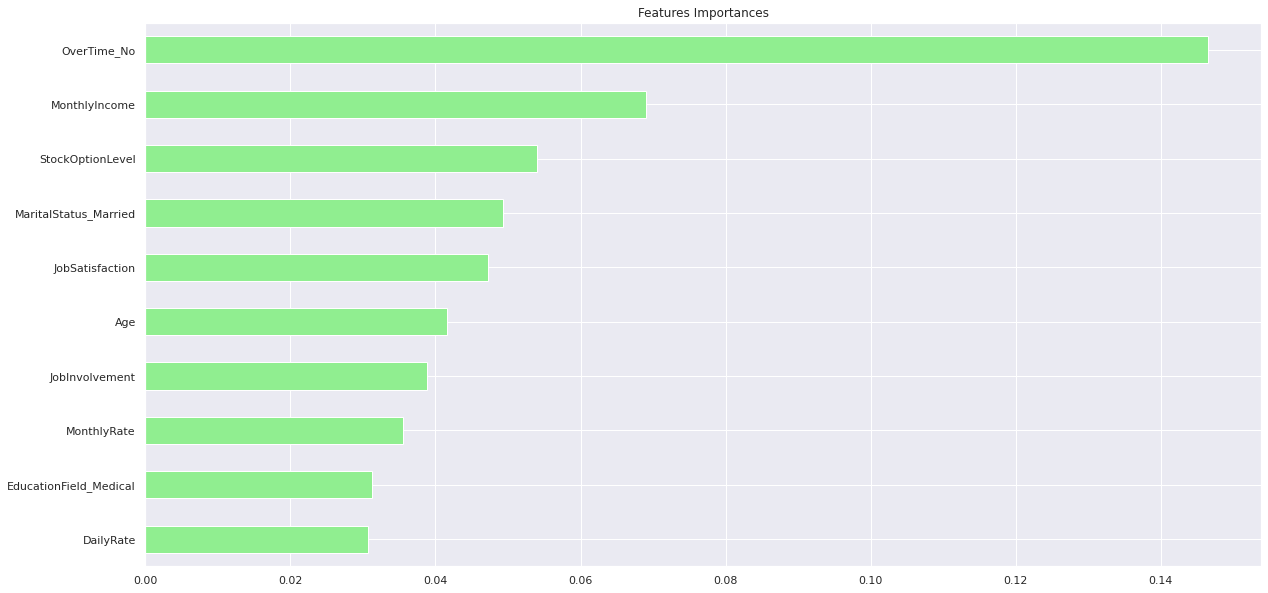

In [55]:
features_importance_plot(best_model_rf,10)

No Skill: ROC AUC=0.500
RandomForestClassifier: ROC AUC=0.764


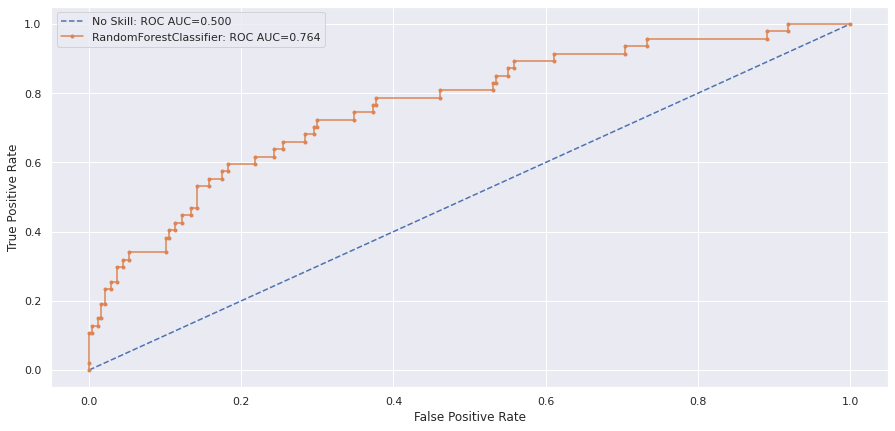

In [56]:
roc_plot([best_model_rf], ['RandomForestClassifier'])

In [57]:
y_pred = best_model_rf.predict(X_test)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       247
           1       0.75      0.13      0.22        47

    accuracy                           0.85       294
   macro avg       0.80      0.56      0.57       294
weighted avg       0.84      0.85      0.81       294



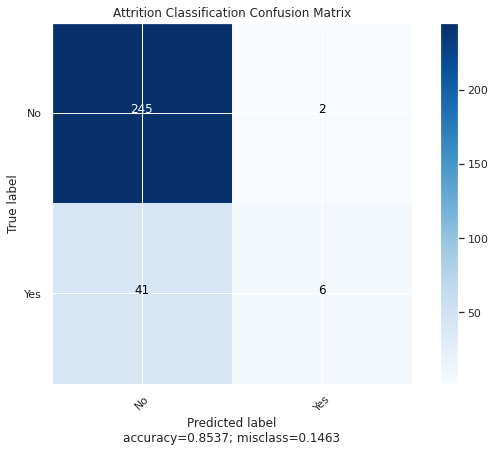

In [59]:
confusionMatrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm           = confusionMatrix, 
                      normalize    = False,
                      target_names = ['No','Yes'],
                      title        = "Attrition Classification Confusion Matrix")

## 4.3.GradientBoosting Model

In [60]:
# Import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

In [61]:
def avg_recall(y_true, y_pred):
    confus = confusion_matrix(y_true, y_pred)
    avg_recall = ((confus[0][0]/(confus[0][0]+confus[0][1])) + (confus[1][1]/(confus[1][1]+confus[1][0]))) /2
    return avg_recall

In [62]:
avg_recall_score = make_scorer(avg_recall, greater_is_better=True)

### 4.3.1.Define optimization parameters

In [63]:
# Gradient Boosting Parameters
params_gb = {'n_estimators':[100, 300, 500, 1000],
             'learning_rate':[0.01, 0.05, 0.1],
             'subsample': [0.4, 0.6, 0.8, 1.0],
             'random_state' :[random_state]}
        #'max_depth': [3, 4, 5, 10, 12]

### 4.3.2.Optimization

In [64]:
grid_gb = GridSearchCV(estimator=GradientBoostingClassifier(),
                       param_grid=params_gb,
                       scoring='roc_auc',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

In [65]:
grid_gb.fit(X_smote_tomek, y_smote_tomek)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  2.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [66]:
# Show the best model
print(grid_gb.best_params_)

{'learning_rate': 0.05, 'n_estimators': 1000, 'random_state': 0, 'subsample': 0.6}


In [67]:
best_model_gb = grid_gb.best_estimator_

### 4.3.3.Display model performance and importance features

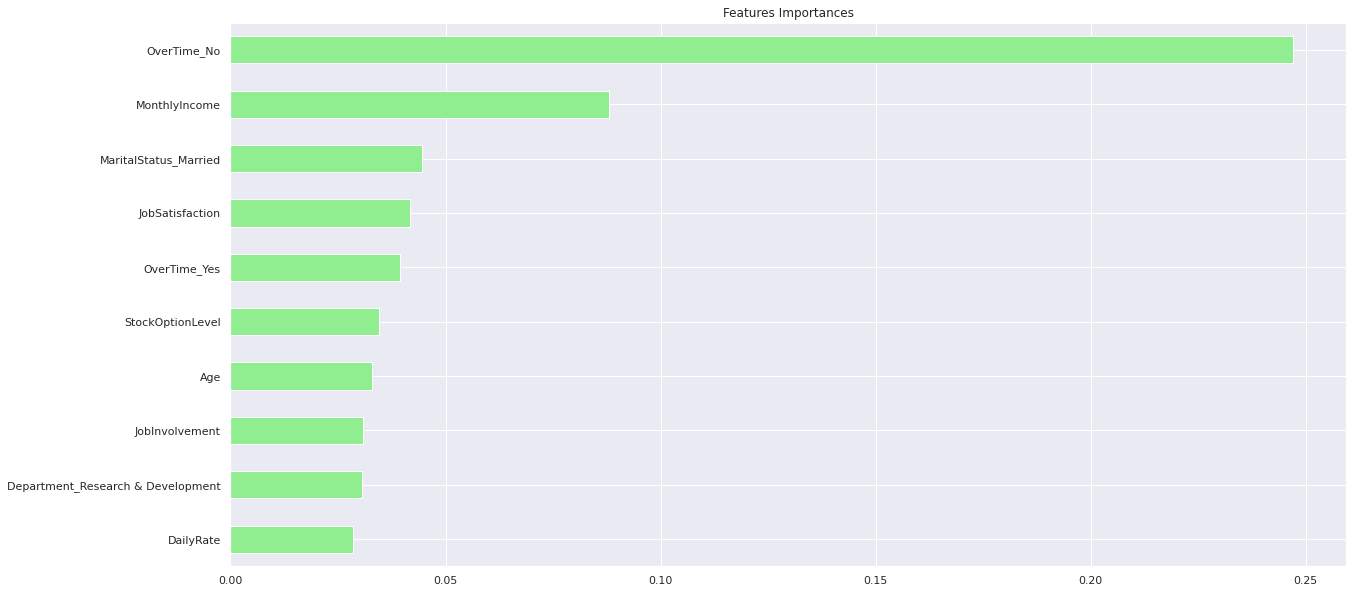

In [68]:
features_importance_plot(best_model_gb,10)

No Skill: ROC AUC=0.500
Gradient Boosting: ROC AUC=0.813


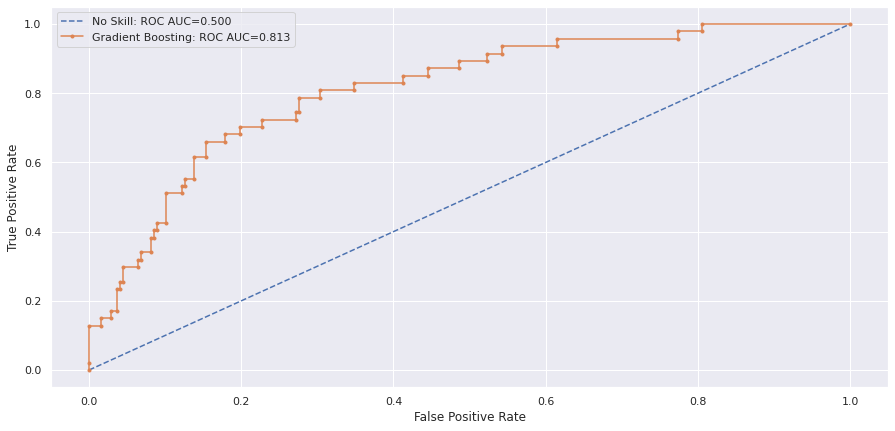

In [71]:
roc_plot([best_model_gb],['Gradient Boosting'])

In [72]:
y_pred = best_model_gb.predict(X_test)

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       247
           1       0.53      0.21      0.30        47

    accuracy                           0.84       294
   macro avg       0.70      0.59      0.61       294
weighted avg       0.81      0.84      0.81       294



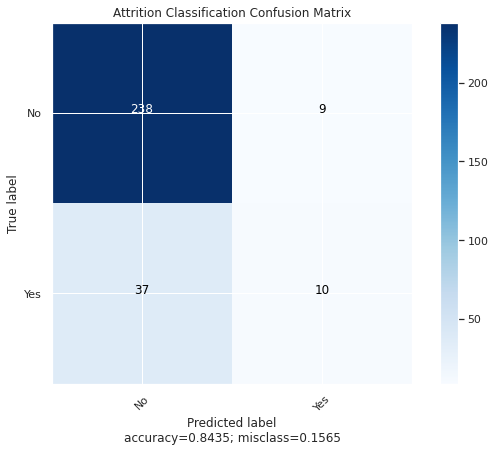

In [74]:
confusionMatrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm           = confusionMatrix, 
                      normalize    = False,
                      target_names = ['No','Yes'],
                      title        = "Attrition Classification Confusion Matrix")

# 5.Conclusion

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.764
Gradient Boosting: ROC AUC=0.813


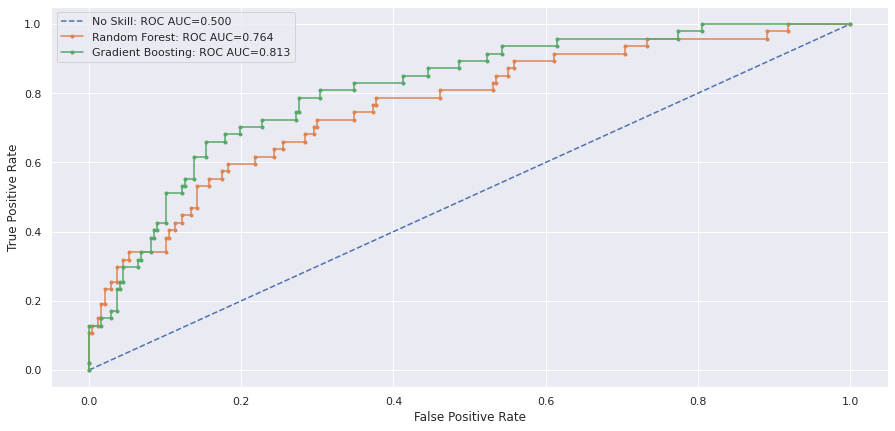

In [75]:
roc_plot([best_model_rf,best_model_gb],['Random Forest', 'Gradient Boosting'])